In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [35]:
data = pd.read_csv('Gemini_ETHUSD_d.csv')
print(" Shape of the XRPUSDT 2023-2024 is: ", data.shape,"\n",
     "The number", data.shape[0], "shows number of samples and the",
     data.shape[1], "shows number of columns.")
data.head(10).style.set_properties(**{'background-color': '#b5caff',
                           'color': 'black',
                           'border-color': 'black'})

 Shape of the XRPUSDT 2023-2024 is:  (3600, 9) 
 The number 3600 shows number of samples and the 9 shows number of columns.


,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1743033600000,2025-03-27 00:00:00,ETH/USD,2009.210000,2037.360000,1986.790000,2001.790000,6326.901700,12665128.554043
1,1742947200000,2025-03-26 00:00:00,ETH/USD,2067.010000,2078.850000,1981.960000,2009.210000,5297.813974,10644420.814701
2,1742860800000,2025-03-25 00:00:00,ETH/USD,2081.380000,2097.340000,2037.930000,2067.010000,5937.018112,12271875.807685
3,1742774400000,2025-03-24 00:00:00,ETH/USD,2005.140000,2103.000000,1977.950000,2081.380000,8512.377211,17717491.679431
4,1742688000000,2025-03-23 00:00:00,ETH/USD,1979.950000,2020.000000,1976.920000,2005.140000,2530.927509,5074863.985396
5,1742601600000,2025-03-22 00:00:00,ETH/USD,1964.490000,2005.380000,1964.280000,1979.950000,1230.377888,2436086.699346
6,1742515200000,2025-03-21 00:00:00,ETH/USD,1983.010000,1994.750000,1937.180000,1964.490000,3967.530317,7794173.632443
7,1742428800000,2025-03-20 00:00:00,ETH/USD,2057.410000,2067.810000,1951.340000,1983.010000,5885.918851,11671835.940722
8,1742342400000,2025-03-19 00:00:00,ETH/USD,1931.380000,2070.000000,1928.030000,2057.410000,9793.709942,20149676.771770
9,1742256000000,2025-03-18 00:00:00,ETH/USD,1926.510000,1935.360000,1872.250000,1931.380000,5299.136845,10234646.919696


In [61]:
df = pd.DataFrame(data)

df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'Volume USD': 'Volume', 'date': 'Date'})
df = df[['Date','Open', 'High', 'Low', 'Close', 'Volume']]
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = df['Volume'].astype('float64')
df.head(10).style.set_properties(**{'background-color': '#b5caff',
                           'color': 'black',
                           'border-color': 'black'})

,Date,Open,High,Low,Close,Volume
0,2025-03-27 00:00:00,2009.210000,2037.360000,1986.790000,2001.790000,12665128.554043
1,2025-03-26 00:00:00,2067.010000,2078.850000,1981.960000,2009.210000,10644420.814701
2,2025-03-25 00:00:00,2081.380000,2097.340000,2037.930000,2067.010000,12271875.807685
3,2025-03-24 00:00:00,2005.140000,2103.000000,1977.950000,2081.380000,17717491.679431
4,2025-03-23 00:00:00,1979.950000,2020.000000,1976.920000,2005.140000,5074863.985396
5,2025-03-22 00:00:00,1964.490000,2005.380000,1964.280000,1979.950000,2436086.699346
6,2025-03-21 00:00:00,1983.010000,1994.750000,1937.180000,1964.490000,7794173.632443
7,2025-03-20 00:00:00,2057.410000,2067.810000,1951.340000,1983.010000,11671835.940722
8,2025-03-19 00:00:00,1931.380000,2070.000000,1928.030000,2057.410000,20149676.771770
9,2025-03-18 00:00:00,1926.510000,1935.360000,1872.250000,1931.380000,10234646.919696


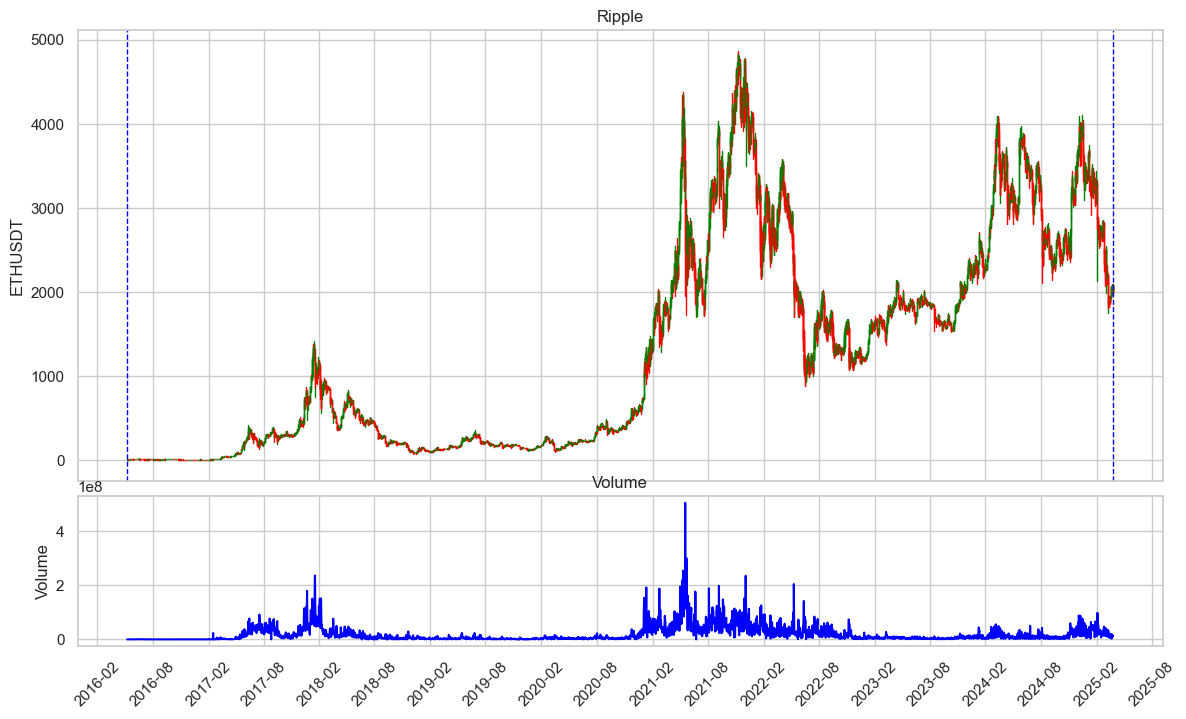

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Optional: ensure seaborn style is applied
sns.set(style="whitegrid")

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, 
                               gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})

# --- Candlestick chart ---
# We draw candlesticks manually using rectangles and lines
for idx, row in df.iterrows():
    color = 'green' if row['Close'] >= row['Open'] else 'red'
    # Wick (high-low line)
    ax1.plot([row['Date'], row['Date']], [row['Low'], row['High']], color=color, linewidth=1)
    # Body (open-close box)
    ax1.add_patch(plt.Rectangle(
        (row['Date'], min(row['Open'], row['Close'])),
        width=pd.Timedelta('1d'),  # Adjust width based on data frequency
        height=abs(row['Open'] - row['Close']),
        color=color
    ))

ax1.set_ylabel("ETHUSDT")
ax1.set_title("Ripple")

# Vertical line shape (from x0 to x1 at full height)
ax1.axvline(pd.to_datetime("2016-05-09"), color='blue', linestyle='--', linewidth=1)
ax1.axvline(pd.to_datetime("2025-03-27"), color='blue', linestyle='--', linewidth=1)

# Format x-axis
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# --- Volume chart ---
ax2.plot(df['Date'], df['Volume'], linewidth=1.5, color='blue')
ax2.set_ylabel("Volume")
ax2.set_title("Volume")

plt.show()


In [63]:
df["5d_sma"] = df["Close"].rolling(5).mean()
df["9d_sma"] = df["Close"].rolling(9).mean()
df["20d_sma"] = df["Close"].rolling(20).mean()

#For the first few vaules, the moving average will be NaN
df['5d_sma'] = df['5d_sma'].fillna(df['Close'])
df['9d_sma'] = df['9d_sma'].fillna(df['Close'])
df['20d_sma'] = df['20d_sma'].fillna(df['Close'])

df

,Date,Open,High,Low,Close,Volume,5d_sma,9d_sma,20d_sma
0,2025-03-27 00:00:00,2009.21,2037.36,1986.79,2001.79,1.266513e+07,2001.790,2001.790000,2001.7900
1,2025-03-26 00:00:00,2067.01,2078.85,1981.96,2009.21,1.064442e+07,2009.210,2009.210000,2009.2100
2,2025-03-25 00:00:00,2081.38,2097.34,2037.93,2067.01,1.227188e+07,2067.010,2067.010000,2067.0100
3,2025-03-24 00:00:00,2005.14,2103.00,1977.95,2081.38,1.771749e+07,2081.380,2081.380000,2081.3800
4,2025-03-23 00:00:00,1979.95,2020.00,1976.92,2005.14,5.074864e+06,2032.906,2005.140000,2005.1400
...,...,...,...,...,...,...,...,...,...
3595,2016-05-13 04:00:00,10.40,11.59,10.20,10.50,1.877445e+04,11.100,12.373333,12.6040
3596,2016-05-12 04:00:00,10.45,12.00,9.92,10.40,2.143453e+04,10.572,11.957778,12.4315
3597,2016-05-11 04:00:00,9.74,10.47,9.69,10.45,3.218110e+04,10.396,11.642222,12.2475
3598,2016-05-10 04:00:00,9.36,9.95,9.36,9.74,7.447480e+03,10.332,11.106667,12.1040


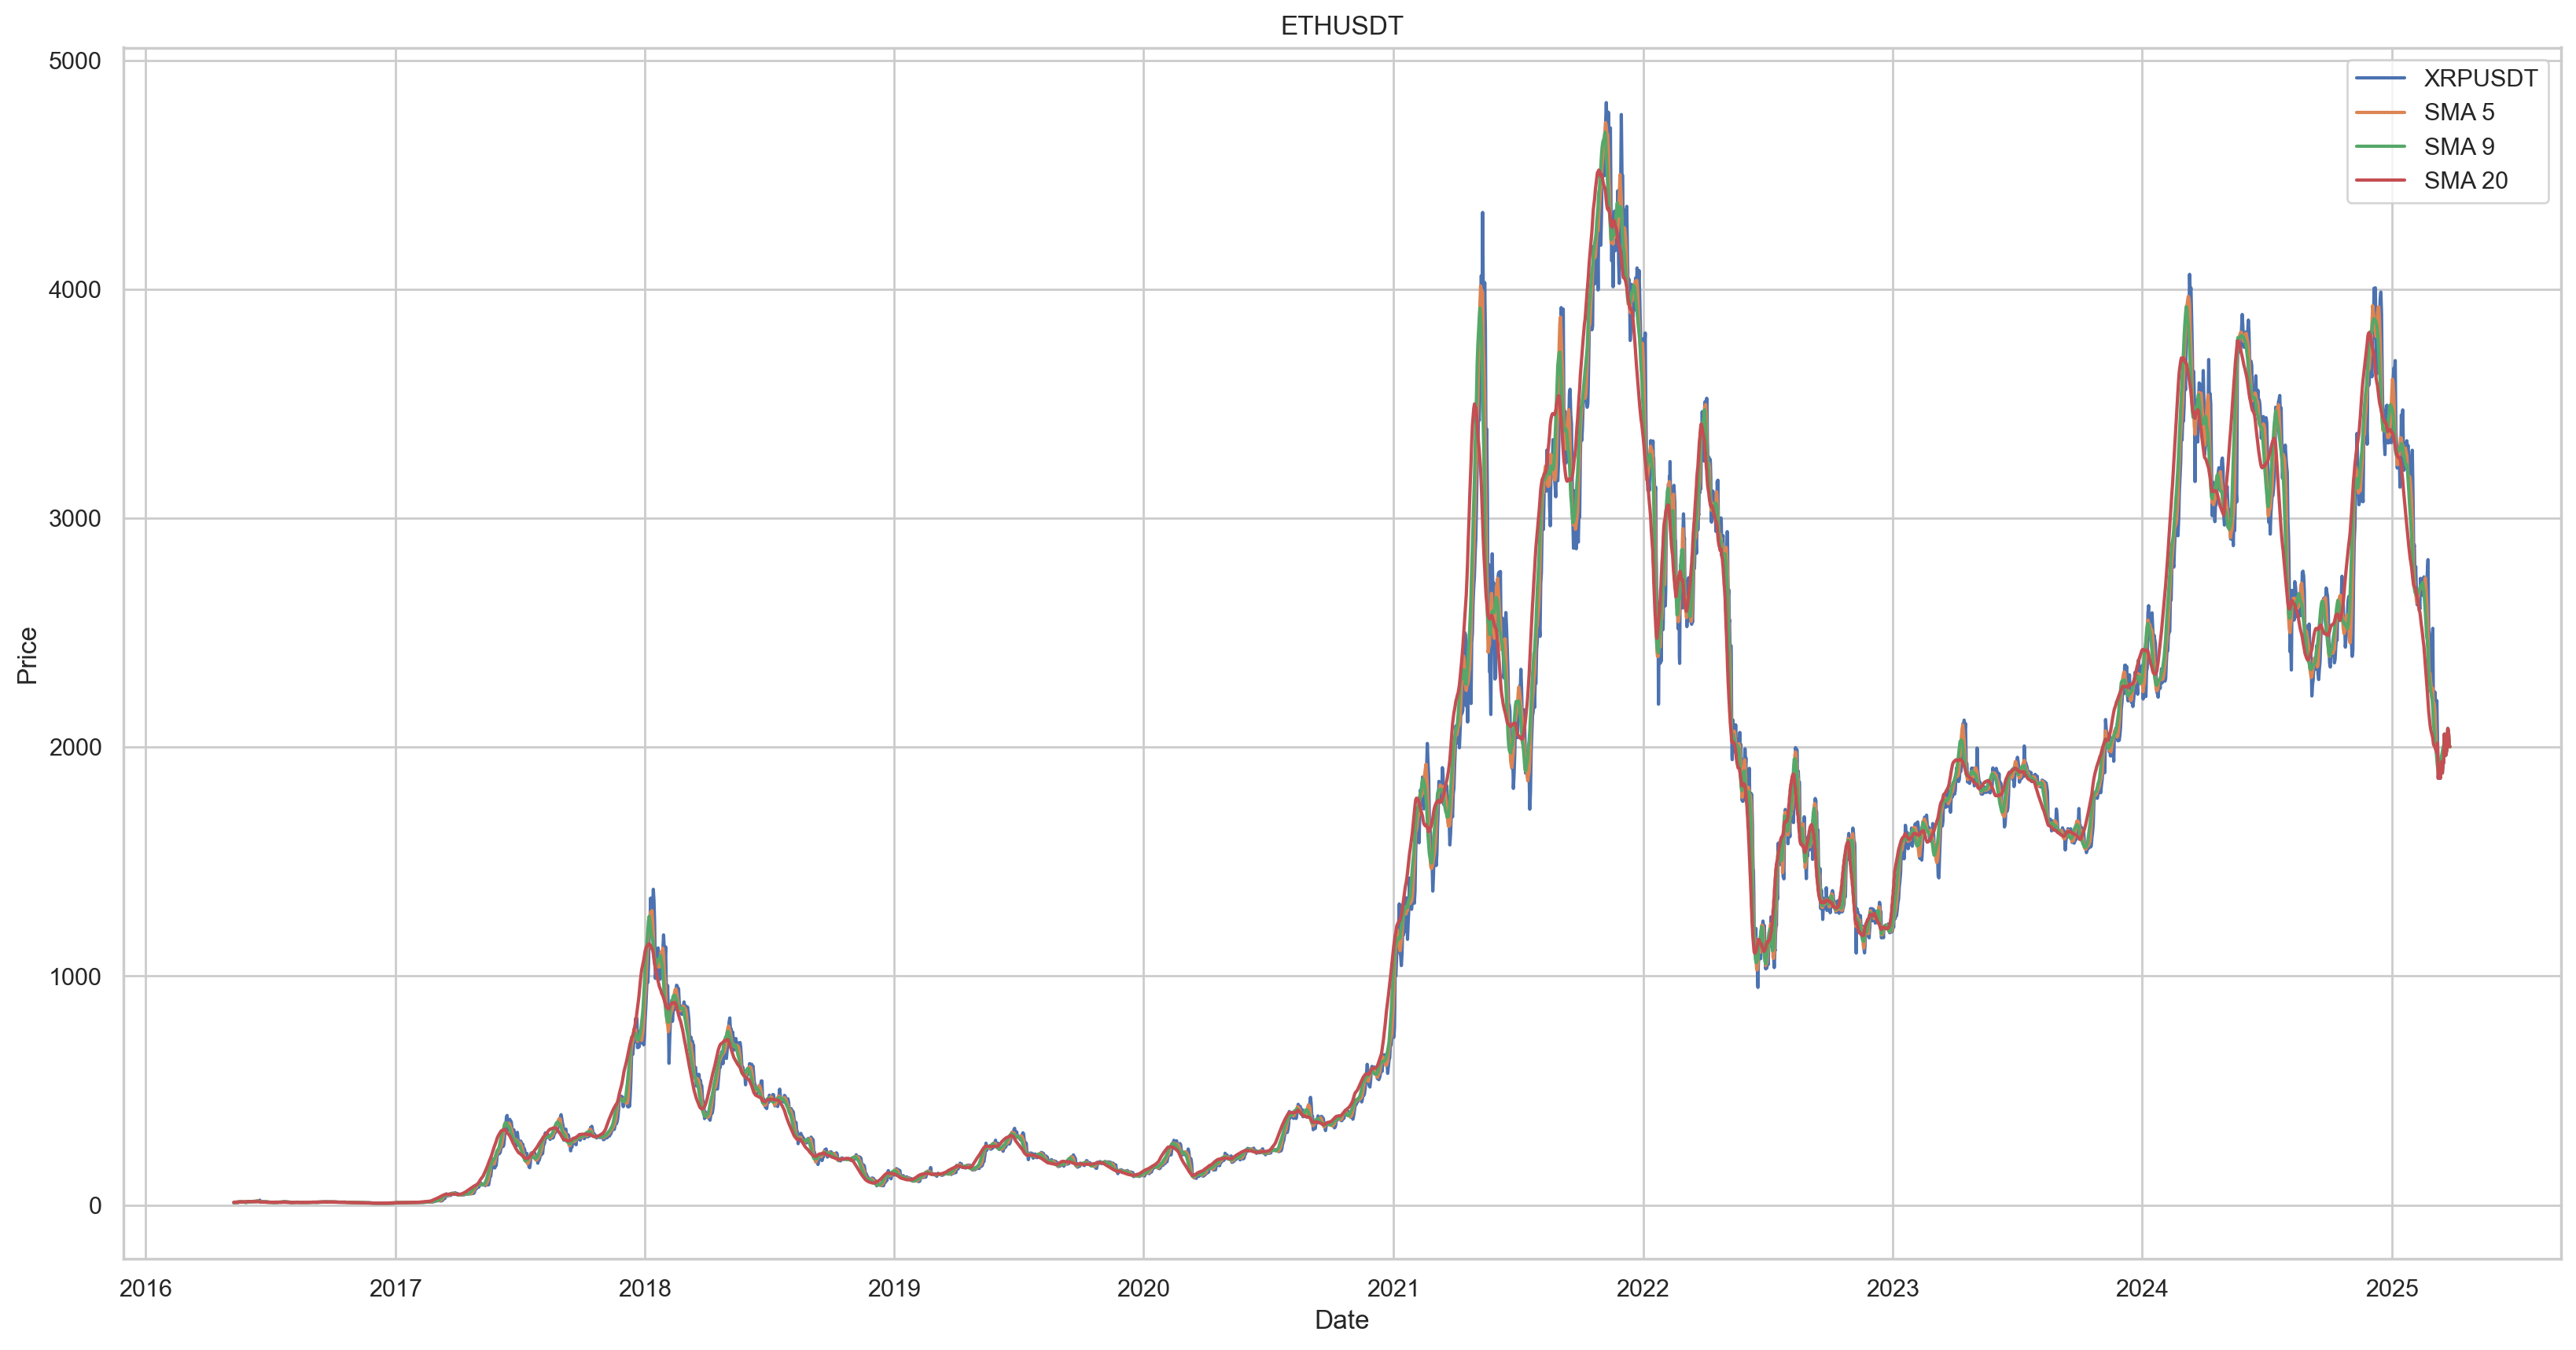

In [ ]:
plt.figure(figsize=(20,10), dpi=200)
plt.plot(df['Date'], df['Close'], label='XRPUSDT')
plt.plot(df['Date'], df['5d_sma'], label='SMA 5')
plt.plot(df['Date'], df['9d_sma'], label='SMA 9')
plt.plot(df['Date'], df['20d_sma'], label='SMA 20')
plt.title('ETHUSDT')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.show()

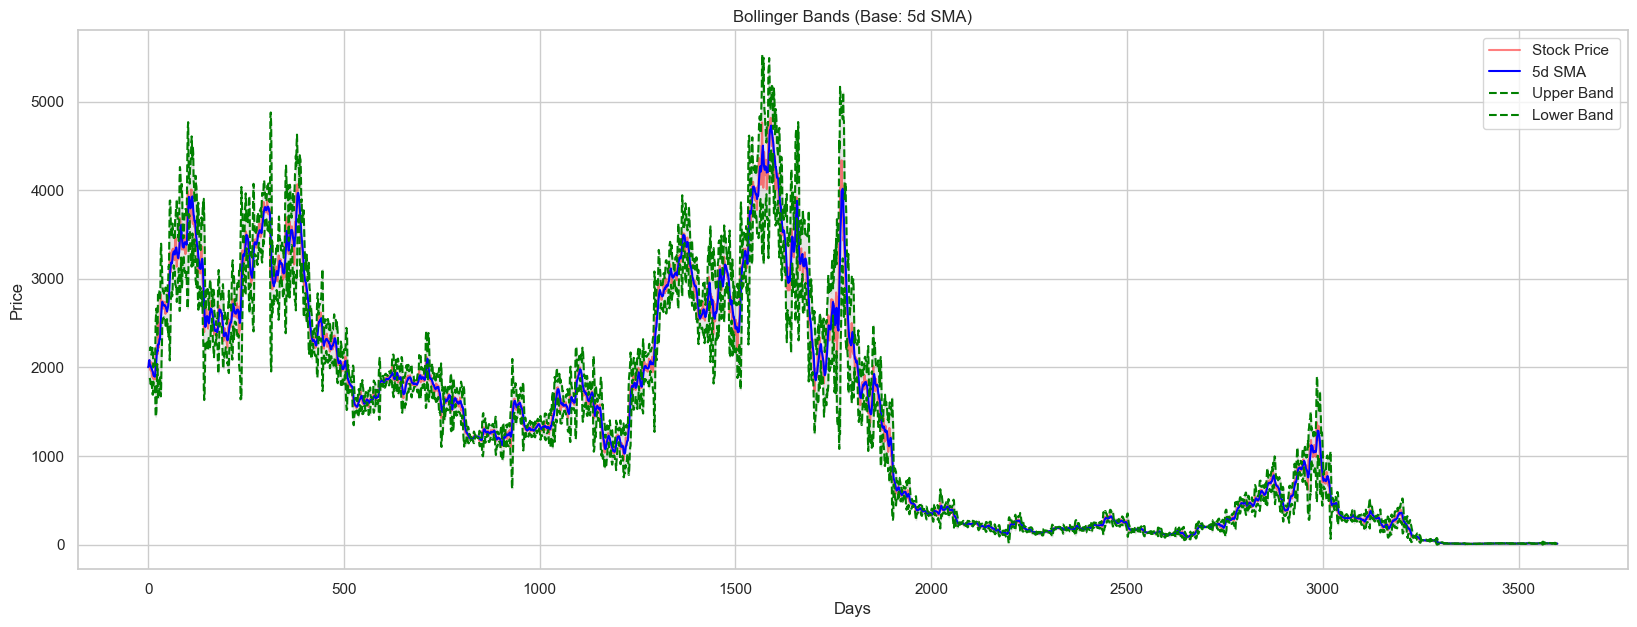

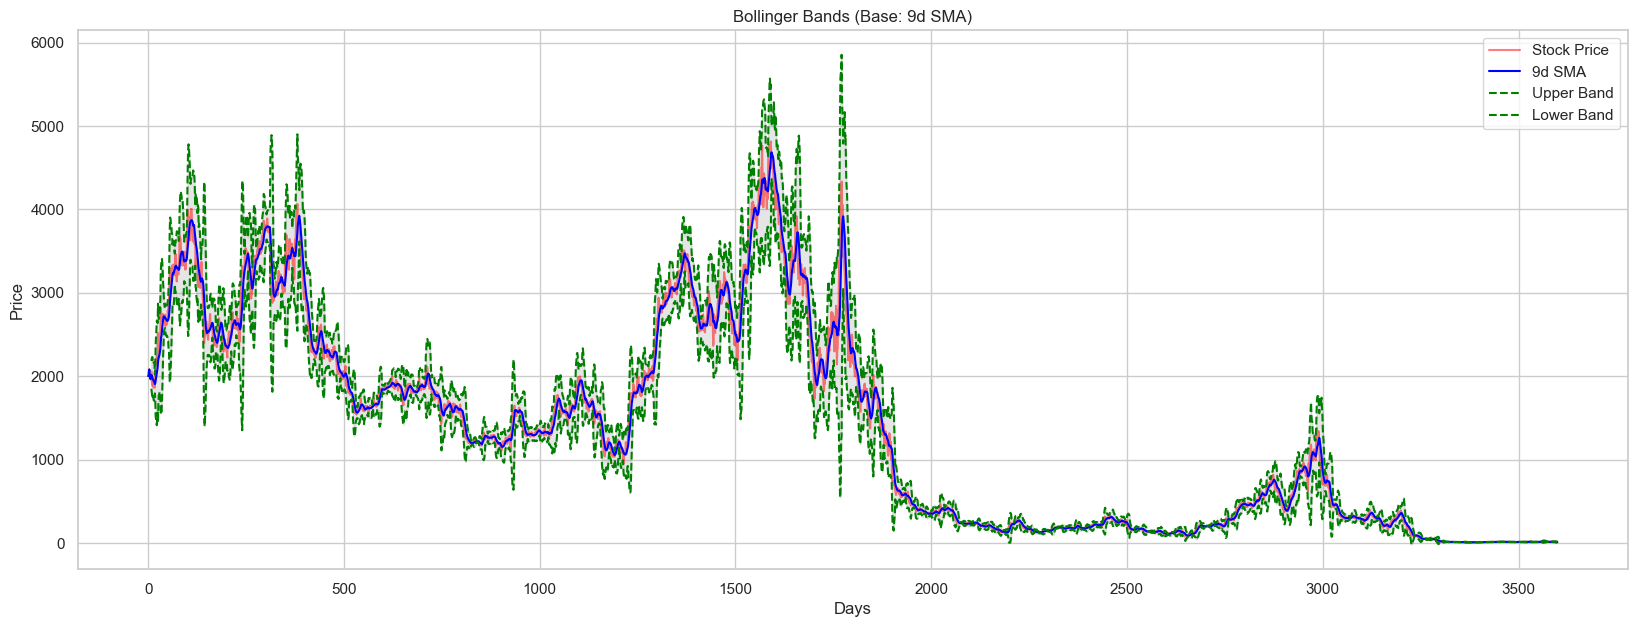

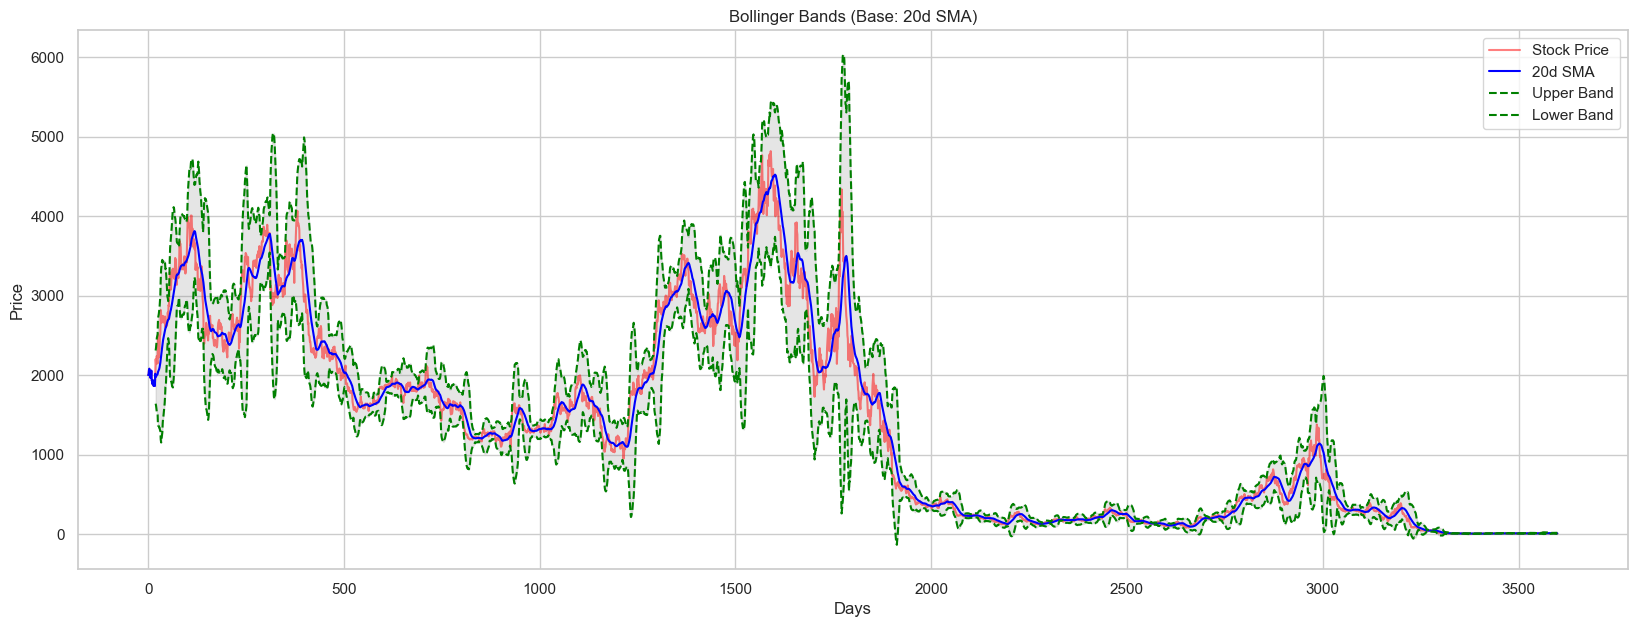

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_std = 4
sma_periods = [5, 9, 20]

for period in sma_periods:
    sma_col = f'{period}d_sma'

    # Use SMA as rolling mean
    rolling_mean = df[sma_col]

    # Compute rolling std from original 'Close' over the same period
    rolling_std = df['Close'].rolling(window=period).std()

    # Bollinger Bands
    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std

    # Plotting
    plt.figure(figsize=(20, 7))
    plt.plot(df['Close'], label='Stock Price', color='red', alpha=0.5)
    plt.plot(rolling_mean, label=f'{period}d SMA', color='blue')
    plt.plot(upper_band, label='Upper Band', color='green', linestyle='--')
    plt.plot(lower_band, label='Lower Band', color='green', linestyle='--')
    plt.fill_between(df.index, lower_band, upper_band, color='grey', alpha=0.2)
    plt.title(f'Bollinger Bands (Base: {period}d SMA)')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


In [120]:
df['Days'] = df.index + 1

_5d = df[['Open','High','Low','Days', '5d_sma','Volume','Close']].copy(deep=True)
_9d = df[['Open','High','Low','Days', '9d_sma','Volume','Close']].copy(deep=True)
_20d = df[['Open','High','Low','Days', '20d_sma','Volume','Close']].copy(deep=True)
_all = df[['Open','High','Low','Days', '5d_sma', '9d_sma', '20d_sma','Volume','Close']].copy(deep=True)

scaler = MinMaxScaler(feature_range=(0,2)).fit(_5d.Low.values.reshape(-1,1))
_5d['Open'] = scaler.transform(_5d.Open.values.reshape(-1,1))
_5d['High'] = scaler.transform(_5d.High.values.reshape(-1,1))
_5d['Low'] = scaler.transform(_5d.Low.values.reshape(-1,1))
_5d['Close'] = scaler.transform(_5d.Close.values.reshape(-1,1))
_5d['Volume'] = scaler.transform(_5d.Volume.values.reshape(-1,1))
_5d['Days'] = scaler.transform(_5d.Days.values.reshape(-1,1))
_5d['5d_sma'] = scaler.transform(_5d['5d_sma'].values.reshape(-1,1))

scaler = MinMaxScaler(feature_range=(0,2)).fit(_9d.Low.values.reshape(-1,1))
_9d['Open'] = scaler.transform(_9d.Open.values.reshape(-1,1))
_9d['High'] = scaler.transform(_9d.High.values.reshape(-1,1))
_9d['Low'] = scaler.transform(_9d.Low.values.reshape(-1,1))
_9d['Close'] = scaler.transform(_9d.Close.values.reshape(-1,1))
_9d['Volume'] = scaler.transform(_9d.Volume.values.reshape(-1,1))
_9d['Days'] = scaler.transform(_9d.Days.values.reshape(-1,1))
_9d['9d_sma'] = scaler.transform(_9d['9d_sma'].values.reshape(-1,1))

scaler = MinMaxScaler(feature_range=(0,2)).fit(_20d.Low.values.reshape(-1,1))
_20d['Open'] = scaler.transform(_20d.Open.values.reshape(-1,1))
_20d['High'] = scaler.transform(_20d.High.values.reshape(-1,1))
_20d['Low'] = scaler.transform(_20d.Low.values.reshape(-1,1))
_20d['Close'] = scaler.transform(_20d.Close.values.reshape(-1,1))
_20d['Volume'] = scaler.transform(_20d.Volume.values.reshape(-1,1))
_20d['Days'] = scaler.transform(_20d.Days.values.reshape(-1,1))
_20d['20d_sma'] = scaler.transform(_20d['20d_sma'].values.reshape(-1,1))

scaler = MinMaxScaler(feature_range=(0,2)).fit(_all.Low.values.reshape(-1,1))
_all['Open'] = scaler.transform(_all.Open.values.reshape(-1,1))
_all['High'] = scaler.transform(_all.High.values.reshape(-1,1))
_all['Low'] = scaler.transform(_all.Low.values.reshape(-1,1))
_all['Close'] = scaler.transform(_all.Close.values.reshape(-1,1))
_all['Volume'] = scaler.transform(_all.Volume.values.reshape(-1,1))
_all['Days'] = scaler.transform(_all.Days.values.reshape(-1,1))
_all['5d_sma'] = scaler.transform(_all['5d_sma'].values.reshape(-1,1))
_all['9d_sma'] = scaler.transform(_all['9d_sma'].values.reshape(-1,1))
_all['20d_sma'] = scaler.transform(_all['20d_sma'].values.reshape(-1,1))


data_5d_all = _5d[['Open','High','Low','Close', '5d_sma', 'Volume', 'Days']].values
data_5d = _5d[['Open','High','Low','Close', '5d_sma']].values
data_9d = _9d[['Open','High','Low', '9d_sma','Close']].values
data_20d = _20d[['Open','High','Low', '20d_sma','Close']].values
data_all = _all[['Open','High','Low', '5d_sma', '9d_sma', '20d_sma','Close']].values

print(data_5d_all.shape)
print(data_5d.shape)
print(data_9d.shape)
print(data_20d.shape)
print(data_all.shape)


(3600, 7)
(3600, 5)
(3600, 5)
(3600, 5)
(3600, 7)


In [100]:
seq_len= 11
sequences_5d_all=[]
for index in range(len(data_5d_all) - seq_len + 1): 
    sequences_5d_all.append(data_5d_all[index: index + seq_len])
sequences_5d_all = np.array(sequences_5d_all)
print(sequences_5d_all.shape)


seq_len= 11
sequences_5d=[]
for index in range(len(data_5d) - seq_len + 1): 
    sequences_5d.append(data_5d[index: index + seq_len])
sequences_5d = np.array(sequences_5d)
print(sequences_5d.shape)


sequences_9d=[]
for index in range(len(data_9d) - seq_len + 1): 
    sequences_9d.append(data_9d[index: index + seq_len])
sequences_9d = np.array(sequences_9d)
print(sequences_9d.shape)


sequences_20d=[]
for index in range(len(data_20d) - seq_len + 1): 
    sequences_20d.append(data_20d[index: index + seq_len])
sequences_20d = np.array(sequences_20d)
print(sequences_20d.shape)


sequences_all=[]
for index in range(len(data_all) - seq_len + 1): 
    sequences_all.append(data_all[index: index + seq_len])
sequences_all = np.array(sequences_all)
print(sequences_all.shape)

(3590, 11, 7)
(3590, 11, 5)
(3590, 11, 5)
(3590, 11, 5)
(3590, 11, 7)


In [124]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 


valid_set_size_5d_all = int(np.round(valid_set_size_percentage/100*sequences_5d_all.shape[0]))  
test_set_size_5d_all  = int(np.round(test_set_size_percentage/100*sequences_5d_all.shape[0]))
train_set_size_5d_all = sequences_5d_all.shape[0] - (valid_set_size_5d_all + test_set_size_5d_all)
print("train_set_size_5d_all", test_set_size_5d_all)

x_train_5d_all = sequences_5d_all[:train_set_size_5d_all,:-1,:]
y_train_5d_all = sequences_5d_all[:train_set_size_5d_all,-1,:]
    
x_valid_5d_all = sequences_5d_all[train_set_size_5d_all:train_set_size_5d_all+valid_set_size_5d_all,
                                  :-1,:]
y_valid_5d_all = sequences_5d_all[train_set_size_5d_all:train_set_size_5d_all+valid_set_size_5d_all
                                  ,-1,:]
    
x_test_5d_all = sequences_5d_all[train_set_size_5d_all+valid_set_size_5d_all:,:-1,:]
y_test_5d_all = sequences_5d_all[train_set_size_5d_all+valid_set_size_5d_all:,-1,:]



valid_set_size_5d = int(np.round(valid_set_size_percentage/100*sequences_5d.shape[0]))  
test_set_size_5d  = int(np.round(test_set_size_percentage/100*sequences_5d.shape[0]))
train_set_size_5d = sequences_5d.shape[0] - (valid_set_size_5d + test_set_size_5d)

x_train_5d = sequences_5d[:train_set_size_5d,:-1,:]
y_train_5d = sequences_5d[:train_set_size_5d,-1,:]
    
x_valid_5d = sequences_5d[train_set_size_5d:train_set_size_5d+valid_set_size_5d,:-1,:]
y_valid_5d = sequences_5d[train_set_size_5d:train_set_size_5d+valid_set_size_5d,-1,:]
    
x_test_5d = sequences_5d[train_set_size_5d+valid_set_size_5d:,:-1,:]
y_test_5d = sequences_5d[train_set_size_5d+valid_set_size_5d:,-1,:]



valid_set_size_9d = int(np.round(valid_set_size_percentage/100*sequences_9d.shape[0]))  
test_set_size_9d  = int(np.round(test_set_size_percentage/100*sequences_9d.shape[0]))
train_set_size_9d = sequences_9d.shape[0] - (valid_set_size_9d + test_set_size_9d)

x_train_9d = sequences_9d[:train_set_size_9d,:-1,:]
y_train_9d = sequences_9d[:train_set_size_9d,-1,:]
    
x_valid_9d = sequences_9d[train_set_size_9d:train_set_size_9d+valid_set_size_9d,:-1,:]
y_valid_9d = sequences_9d[train_set_size_9d:train_set_size_9d+valid_set_size_9d,-1,:]
    
x_test_9d = sequences_9d[train_set_size_9d+valid_set_size_9d:,:-1,:]
y_test_9d = sequences_9d[train_set_size_9d+valid_set_size_9d:,-1,:]



valid_set_size_20d = int(np.round(valid_set_size_percentage/100*sequences_20d.shape[0]))  
test_set_size_20d  = int(np.round(test_set_size_percentage/100*sequences_20d.shape[0]))
train_set_size_20d = sequences_20d.shape[0] - (valid_set_size_20d + test_set_size_20d)

x_train_20d = sequences_20d[:train_set_size_20d,:-1,:]
y_train_20d = sequences_20d[:train_set_size_20d,-1,:]
    
x_valid_20d = sequences_20d[train_set_size_20d:train_set_size_20d+valid_set_size_20d,:-1,:]
y_valid_20d = sequences_20d[train_set_size_20d:train_set_size_20d+valid_set_size_20d,-1,:]
    
x_test_20d = sequences_20d[train_set_size_20d+valid_set_size_20d:,:-1,:]
y_test_20d = sequences_20d[train_set_size_20d+valid_set_size_20d:,-1,:]



valid_set_size_all = int(np.round(valid_set_size_percentage/100*sequences_all.shape[0]))  
test_set_size_all  = int(np.round(test_set_size_percentage/100*sequences_all.shape[0]))
train_set_size_all = sequences_5d.shape[0] - (valid_set_size_all + test_set_size_all)

x_train_all = sequences_all[:train_set_size_all,:-1,:]
y_train_all = sequences_all[:train_set_size_all,-1,:]
    
x_valid_all = sequences_all[train_set_size_all:train_set_size_all+valid_set_size_all,:-1,:]
y_valid_all = sequences_all[train_set_size_all:train_set_size_all+valid_set_size_all,-1,:]
    
x_test_all = sequences_all[train_set_size_all+valid_set_size_all:,:-1,:]
y_test_all = sequences_all[train_set_size_all+valid_set_size_all:,-1,:]

train_set_size_5d_all 359


In [ ]:
x_train_5d_all = torch.tensor(x_train_5d_all).float()
y_train_5d_all = torch.tensor(y_train_5d_all).float()

x_valid_5d_all = torch.tensor(x_valid_5d_all).float()
y_valid_5d_all = torch.tensor(y_valid_5d_all).float()

train_dataset_5d_all = TensorDataset(x_train_5d_all,y_train_5d_all)
train_dataloader_5d_all = DataLoader(train_dataset_5d_all, batch_size=32, shuffle=False)

valid_dataset_5d_all = TensorDataset(x_valid_5d_all,y_valid_5d_all)
valid_dataloader_5d_all = DataLoader(valid_dataset_5d_all, batch_size=32, shuffle=False)




x_train_5d = torch.tensor(x_train_5d).float()
y_train_5d = torch.tensor(y_train_5d).float()

x_valid_5d = torch.tensor(x_valid_5d).float()
y_valid_5d = torch.tensor(y_valid_5d).float()

train_dataset_5d = TensorDataset(x_train_5d,y_train_5d)
train_dataloader_5d = DataLoader(train_dataset_5d, batch_size=32, shuffle=False)

valid_dataset_5d = TensorDataset(x_valid_5d,y_valid_5d)
valid_dataloader_5d = DataLoader(valid_dataset_5d, batch_size=32, shuffle=False)



x_train_9d = torch.tensor(x_train_9d).float()
y_train_9d = torch.tensor(y_train_9d).float()

x_valid_9d = torch.tensor(x_valid_9d).float()
y_valid_9d = torch.tensor(y_valid_9d).float()

train_dataset_9d = TensorDataset(x_train_9d,y_train_9d)
train_dataloader_9d = DataLoader(train_dataset_9d, batch_size=32, shuffle=False)

valid_dataset_9d = TensorDataset(x_valid_9d,y_valid_9d)
valid_dataloader_9d = DataLoader(valid_dataset_9d, batch_size=32, shuffle=False)



x_train_20d = torch.tensor(x_train_20d).float()
y_train_20d = torch.tensor(y_train_20d).float()

x_valid_20d = torch.tensor(x_valid_20d).float()
y_valid_20d = torch.tensor(y_valid_20d).float()

train_dataset_20d = TensorDataset(x_train_20d,y_train_20d)
train_dataloader_20d = DataLoader(train_dataset_20d, batch_size=32, shuffle=False)

valid_dataset_20d = TensorDataset(x_valid_20d,y_valid_20d)
valid_dataloader_20d = DataLoader(valid_dataset_20d, batch_size=32, shuffle=False)



x_train_all = torch.tensor(x_train_all).float()
y_train_all = torch.tensor(y_train_all).float()

x_valid_all = torch.tensor(x_valid_all).float()
y_valid_all = torch.tensor(y_valid_all).float()

train_dataset_all = TensorDataset(x_train_all,y_train_all)
train_dataloader_all = DataLoader(train_dataset_all, batch_size=32, shuffle=False)

valid_dataset_all = TensorDataset(x_valid_all,y_valid_all)
valid_dataloader_all = DataLoader(valid_dataset_all, batch_size=32, shuffle=False)

In [103]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature):
        super(NeuralNetwork, self).__init__()
        self.lstm  = nn.LSTM(num_feature,64,batch_first=True)
        self.fc    = nn.Linear(64,num_feature)
        
        
    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.fc(hidden)
        return x


model_5d_all = NeuralNetwork(7)


optimizer = optim.Adam(model_5d_all.parameters())
mse = nn.MSELoss()


def train(dataloader):
    epoch_loss = 0
    model_5d_all.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_5d_all(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

def evaluate(dataloader):
    epoch_loss = 0
    model_5d_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_5d_all(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [104]:
n_epochs = 100
best_valid_loss_5d_all = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_5d_all = train(train_dataloader_5d_all)
    valid_loss_5d_all = evaluate(valid_dataloader_5d_all)
    
    #save the best model
    if valid_loss_5d_all < best_valid_loss_5d_all:
        best_valid_loss_5d_all = valid_loss_5d_all
        torch.save(model_5d_all, 'saved_weights_5d_all.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_5d_all:.5f} | ' + f'\tVal Loss: {valid_loss_5d_all:.5f}\n')

	Train Loss: 3032296275.85938 | 	Val Loss: 54774590.23438

	Train Loss: 3031642239.62500 | 	Val Loss: 54758857.97656

	Train Loss: 3030471075.16406 | 	Val Loss: 54733710.52083

	Train Loss: 3029088447.42188 | 	Val Loss: 54710328.39583

	Train Loss: 3027636780.92969 | 	Val Loss: 54680644.85938

	Train Loss: 3026131887.57812 | 	Val Loss: 54658444.96875

	Train Loss: 3024978054.55469 | 	Val Loss: 54639243.09115

	Train Loss: 3023919793.20312 | 	Val Loss: 54621029.18229

	Train Loss: 3022905773.53125 | 	Val Loss: 54603393.32552

	Train Loss: 3021919617.77344 | 	Val Loss: 54586155.07031

	Train Loss: 3020952946.37500 | 	Val Loss: 54569199.59115

	Train Loss: 3020000492.56250 | 	Val Loss: 54552461.00781

	Train Loss: 3019059599.11719 | 	Val Loss: 54535892.71615

	Train Loss: 3018127465.57812 | 	Val Loss: 54519460.74479

	Train Loss: 3017202915.45312 | 	Val Loss: 54503148.01302

	Train Loss: 3016284439.28906 | 	Val Loss: 54486928.82292

	Train Loss: 3015371249.00000 | 	Val Loss: 54470792.6796

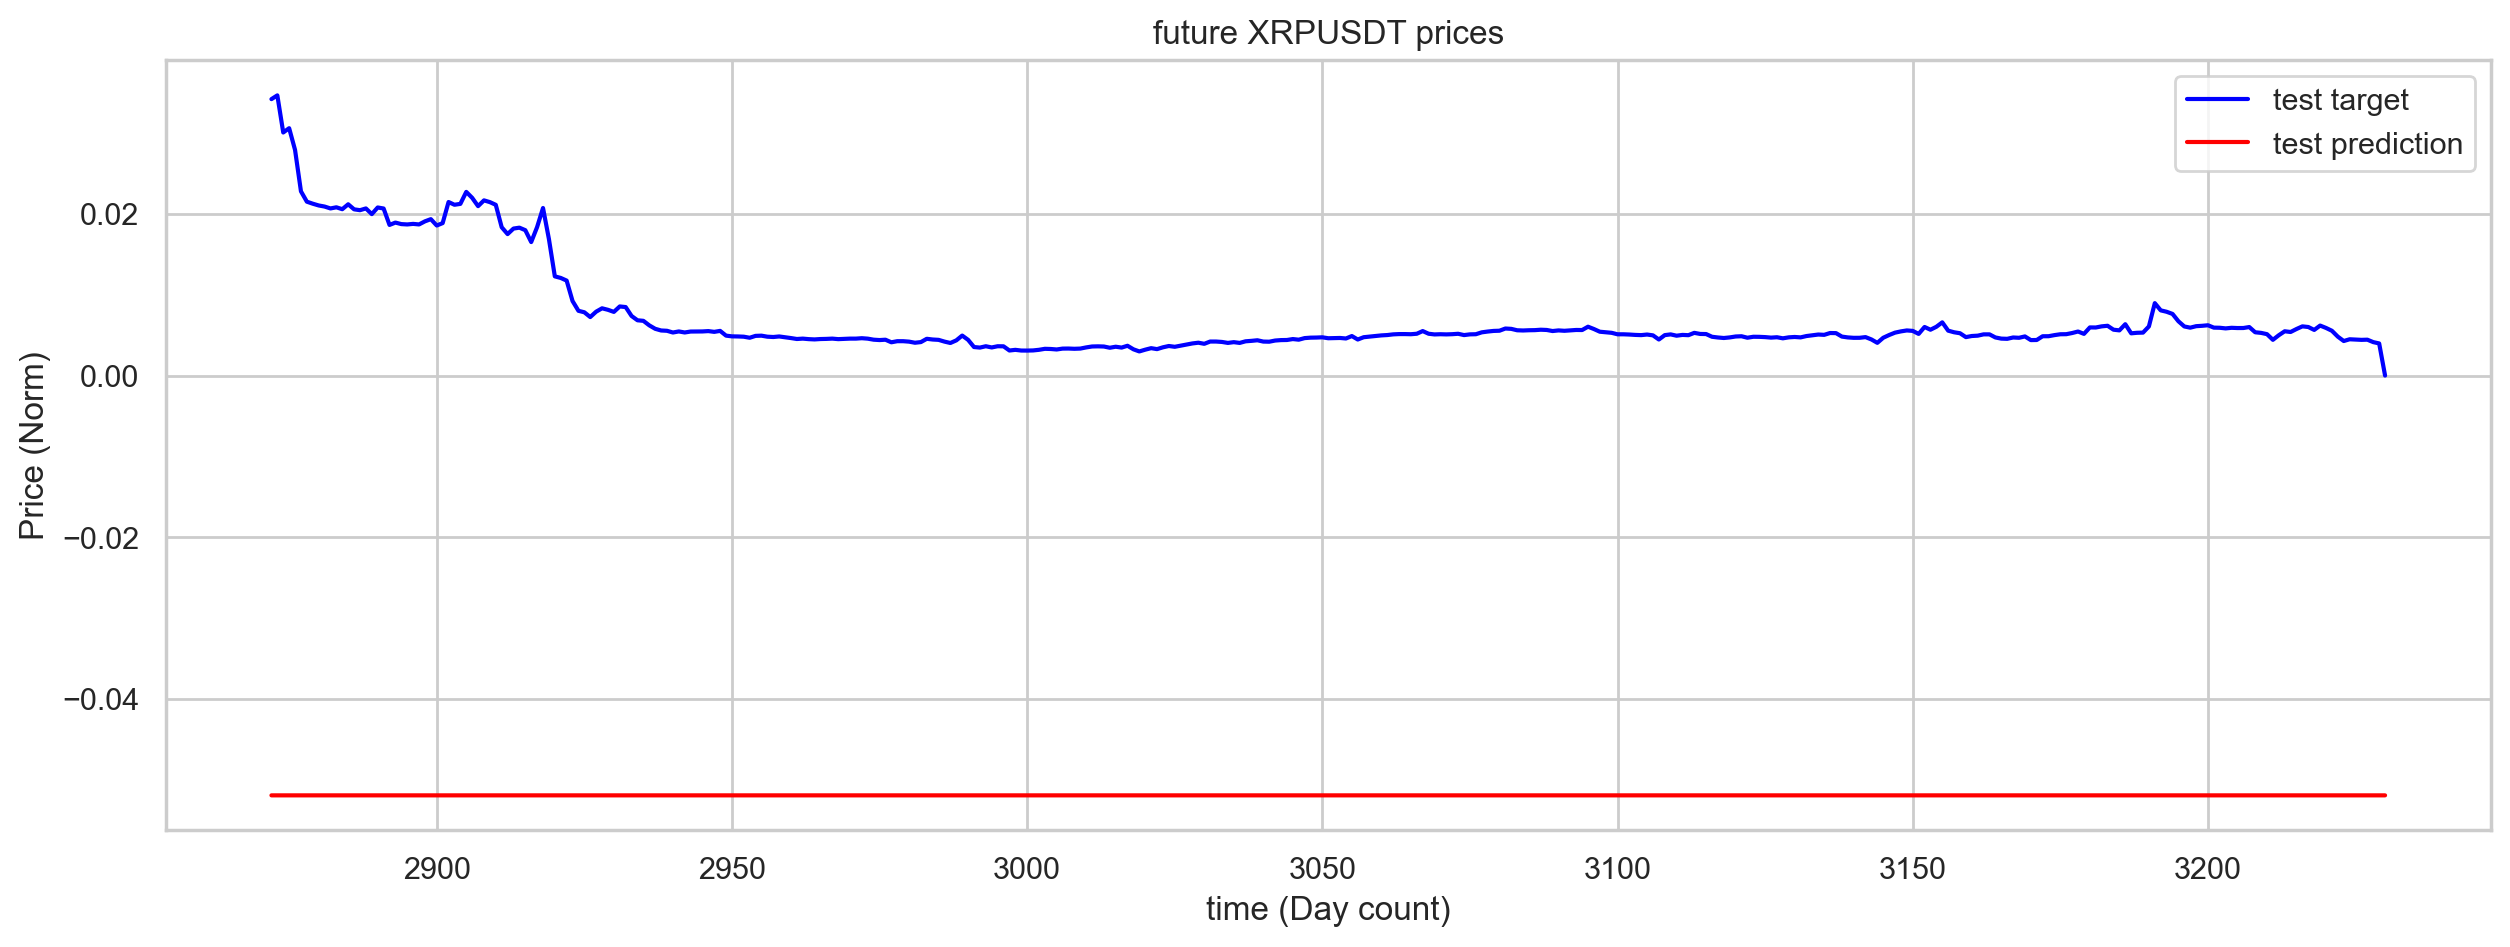

In [105]:
model_5d_all =torch.load('saved_weights_5d_all.pt', weights_only=False)


x_test_5d_all = torch.tensor(x_test_5d_all).float()

with torch.no_grad():
    y_test_pred_5d_all = model_5d_all(x_test_5d_all)

y_test_pred_5d_all = y_test_pred_5d_all.numpy()[0]

idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_5d_all.shape[0], y_train_5d_all.shape[0]+y_test_5d_all.shape[0]),
         y_test_5d_all[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_5d_all.shape[0], y_train_5d_all.shape[0]+y_test_pred_5d_all.shape[0]),
         y_test_pred_5d_all[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot();

In [153]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature):
        super(NeuralNetwork, self).__init__()
        self.lstm  = nn.LSTM(num_feature,64,batch_first=True)
        self.fc    = nn.Linear(64,num_feature)  
        
    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.fc(hidden)
        # print(x.shape, hidden.shape, cell.shape, output.shape) 
        # torch.Size([1, 32, 5]) torch.Size([1, 32, 64]) torch.Size([1, 32, 64]) torch.Size([32, 10, 64])
        return x



In [160]:
model_5d = NeuralNetwork(5)

optimizer = optim.Adam(model_5d.parameters())
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)  # Reduce LR by 10x every 50 epochs

def train(dataloader):
    epoch_loss = 0
    model_5d.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_5d(x)
        loss = loss = 0.8 * nn.MSELoss()(pred[0], y) + 0.2 * nn.L1Loss()(pred[0], y)      
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

def evaluate(dataloader):
    epoch_loss = 0
    model_5d.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_5d(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

n_epochs = 100
best_valid_loss_5d = float('inf')

for epoch in range(1, n_epochs + 1 ):

    train_loss_5d = train(train_dataloader_5d)
    valid_loss_5d = evaluate(valid_dataloader_5d)
    
    scheduler.step()
    
    #save the best model
    if valid_loss_5d < best_valid_loss_5d:
        best_valid_loss_5d = valid_loss_5d
        torch.save(model_5d, 'saved_weights_5d.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_5d:.5f} | ' + f'\tVal Loss: {valid_loss_5d:.5f}\n')
    
print("The best model is: ", best_valid_loss_5d)

	Train Loss: 22.07239 | 	Val Loss: 0.01060

	Train Loss: 5.52770 | 	Val Loss: 0.00688

	Train Loss: 4.03053 | 	Val Loss: 0.00503

	Train Loss: 3.24765 | 	Val Loss: 0.00471

	Train Loss: 2.84140 | 	Val Loss: 0.00412

	Train Loss: 2.43633 | 	Val Loss: 0.00342

	Train Loss: 2.14934 | 	Val Loss: 0.00318

	Train Loss: 1.93517 | 	Val Loss: 0.00274

	Train Loss: 1.74452 | 	Val Loss: 0.00255

	Train Loss: 1.57652 | 	Val Loss: 0.00221

	Train Loss: 1.40468 | 	Val Loss: 0.00209

	Train Loss: 1.28666 | 	Val Loss: 0.00201

	Train Loss: 1.22424 | 	Val Loss: 0.00195

	Train Loss: 1.18252 | 	Val Loss: 0.00190

	Train Loss: 1.15285 | 	Val Loss: 0.00184

	Train Loss: 1.12566 | 	Val Loss: 0.00180

	Train Loss: 1.10371 | 	Val Loss: 0.00173

	Train Loss: 1.08240 | 	Val Loss: 0.00169

	Train Loss: 1.06662 | 	Val Loss: 0.00164

	Train Loss: 1.04717 | 	Val Loss: 0.00158

	Train Loss: 1.02820 | 	Val Loss: 0.00155

	Train Loss: 1.02070 | 	Val Loss: 0.00152

	Train Loss: 1.00670 | 	Val Loss: 0.00147

	Train Los

/var/folders/7_/0hhqk3r108sg_425jwnnfv1h0000gn/T/ipykernel_59420/3711767162.py:3: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



[]

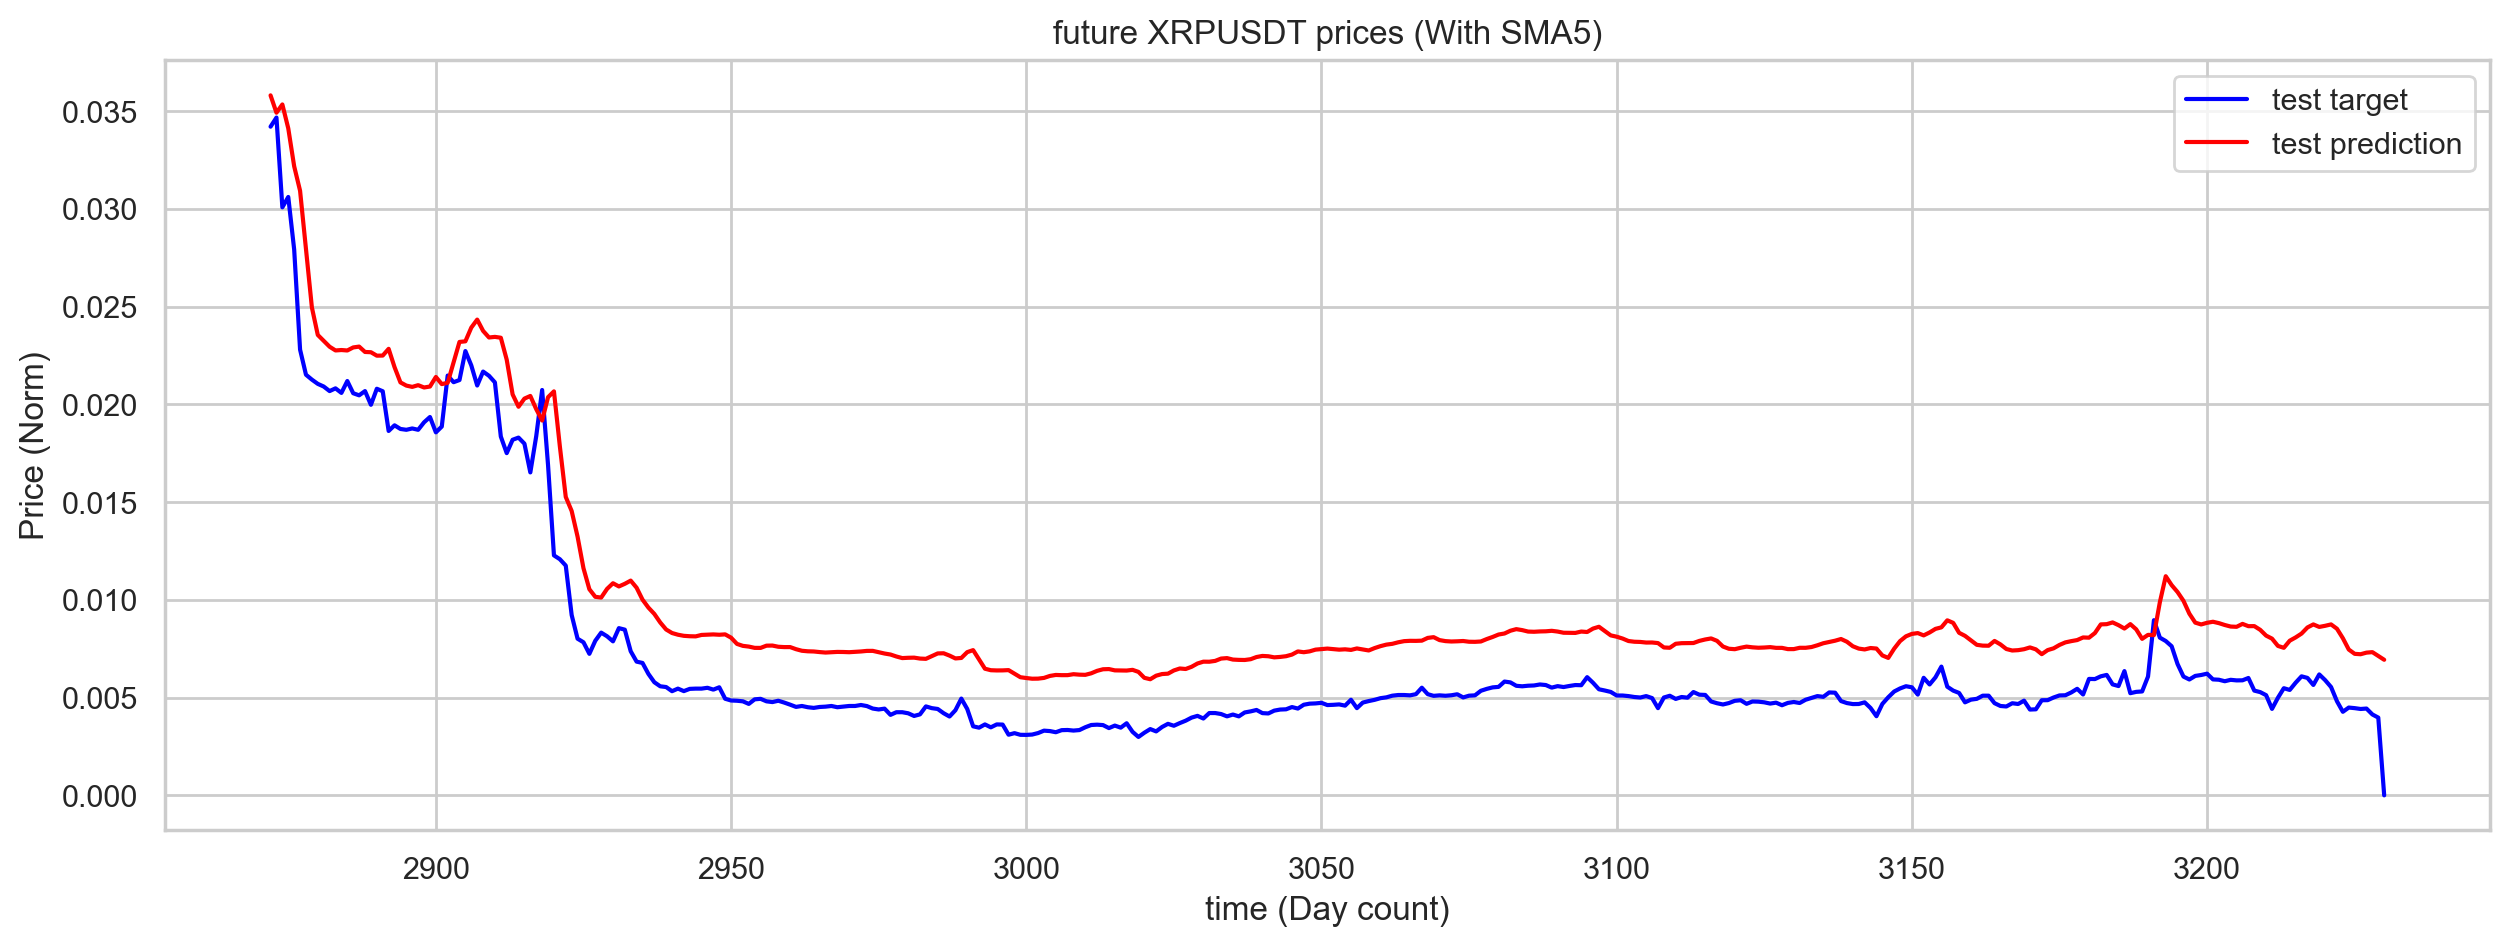

In [162]:
model_5d =torch.load('saved_weights_5d.pt', weights_only=False)

x_test_5d = torch.tensor(x_test_5d).float()

with torch.no_grad():
    y_test_pred_5d = model_5d(x_test_5d)

y_test_pred_5d = y_test_pred_5d.numpy()[0]

idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_5d.shape[0]),
         y_test_5d[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_pred_5d.shape[0]),
         y_test_pred_5d[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA5)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot()

In [163]:
print(y_test_pred_5d)
y_test_5d

[[0.03581418 0.03570697 0.03736953 0.03667872 0.03636929]
 [0.03492736 0.03473242 0.03654128 0.03583435 0.03524984]
 [0.03534892 0.03511576 0.03688216 0.03615585 0.03477098]
 ...
 [0.00732767 0.00538797 0.01166857 0.00825354 0.00468538]
 [0.00712974 0.00518214 0.01149563 0.00806126 0.00454417]
 [0.00693664 0.00498261 0.01132602 0.00787902 0.0044002 ]]


array([[0.03421128, 0.03421128, 0.03166562, 0.03268984, 0.03760946],
       [0.03467876, 0.03605572, 0.03064991, 0.03421128, 0.0363753 ],
       [0.03008468, 0.03523124, 0.02953645, 0.03467876, 0.03533919],
       ...,
       [0.00413935, 0.00444959, 0.0041181 , 0.00444109, 0.00441814],
       [0.00397786, 0.0042286 , 0.00397786, 0.00413935, 0.00439094],
       [0.        , 0.00509982, 0.        , 0.00397786, 0.0042881 ]],
      shape=(359, 5))

In [159]:
print(model_5d.fc.bias.data)
(y_test_pred_5d - y_test_5d).mean().item()


tensor([0.0970, 0.0895, 0.1022, 0.0918, 0.0767])


0.0035545366786073965

In [164]:
model_9d = NeuralNetwork(5)

optimizer = optim.Adam(model_9d.parameters())

def train(dataloader):
    epoch_loss = 0
    model_9d.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_9d(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

def evaluate(dataloader):
    epoch_loss = 0
    model_9d.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_9d(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

n_epochs = 150
best_valid_loss_9d = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_9d = train(train_dataloader_9d)
    valid_loss_9d = evaluate(valid_dataloader_9d)
    
    #save the best model
    if valid_loss_9d < best_valid_loss_9d:
        best_valid_loss_9d = valid_loss_9d
        torch.save(model_9d, 'saved_weights_9d.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_9d:.5f} | ' + f'\tVal Loss: {valid_loss_9d:.5f}\n')

	Train Loss: 22.29793 | 	Val Loss: 0.01016

	Train Loss: 4.60397 | 	Val Loss: 0.00458

	Train Loss: 1.25158 | 	Val Loss: 0.00371

	Train Loss: 0.81858 | 	Val Loss: 0.00357

	Train Loss: 0.70701 | 	Val Loss: 0.00355

	Train Loss: 0.68914 | 	Val Loss: 0.00362

	Train Loss: 0.74647 | 	Val Loss: 0.00377

	Train Loss: 0.87701 | 	Val Loss: 0.00387

	Train Loss: 1.02746 | 	Val Loss: 0.00367

	Train Loss: 1.05446 | 	Val Loss: 0.00313

	Train Loss: 0.88670 | 	Val Loss: 0.00249

	Train Loss: 0.65799 | 	Val Loss: 0.00201

	Train Loss: 0.49001 | 	Val Loss: 0.00171

	Train Loss: 0.39324 | 	Val Loss: 0.00153

	Train Loss: 0.34395 | 	Val Loss: 0.00144

	Train Loss: 0.32430 | 	Val Loss: 0.00140

	Train Loss: 0.32522 | 	Val Loss: 0.00141

	Train Loss: 0.34227 | 	Val Loss: 0.00144

	Train Loss: 0.37210 | 	Val Loss: 0.00149

	Train Loss: 0.40958 | 	Val Loss: 0.00154

	Train Loss: 0.44523 | 	Val Loss: 0.00155

	Train Loss: 0.46571 | 	Val Loss: 0.00150

	Train Loss: 0.46119 | 	Val Loss: 0.00141

	Train Los

[]

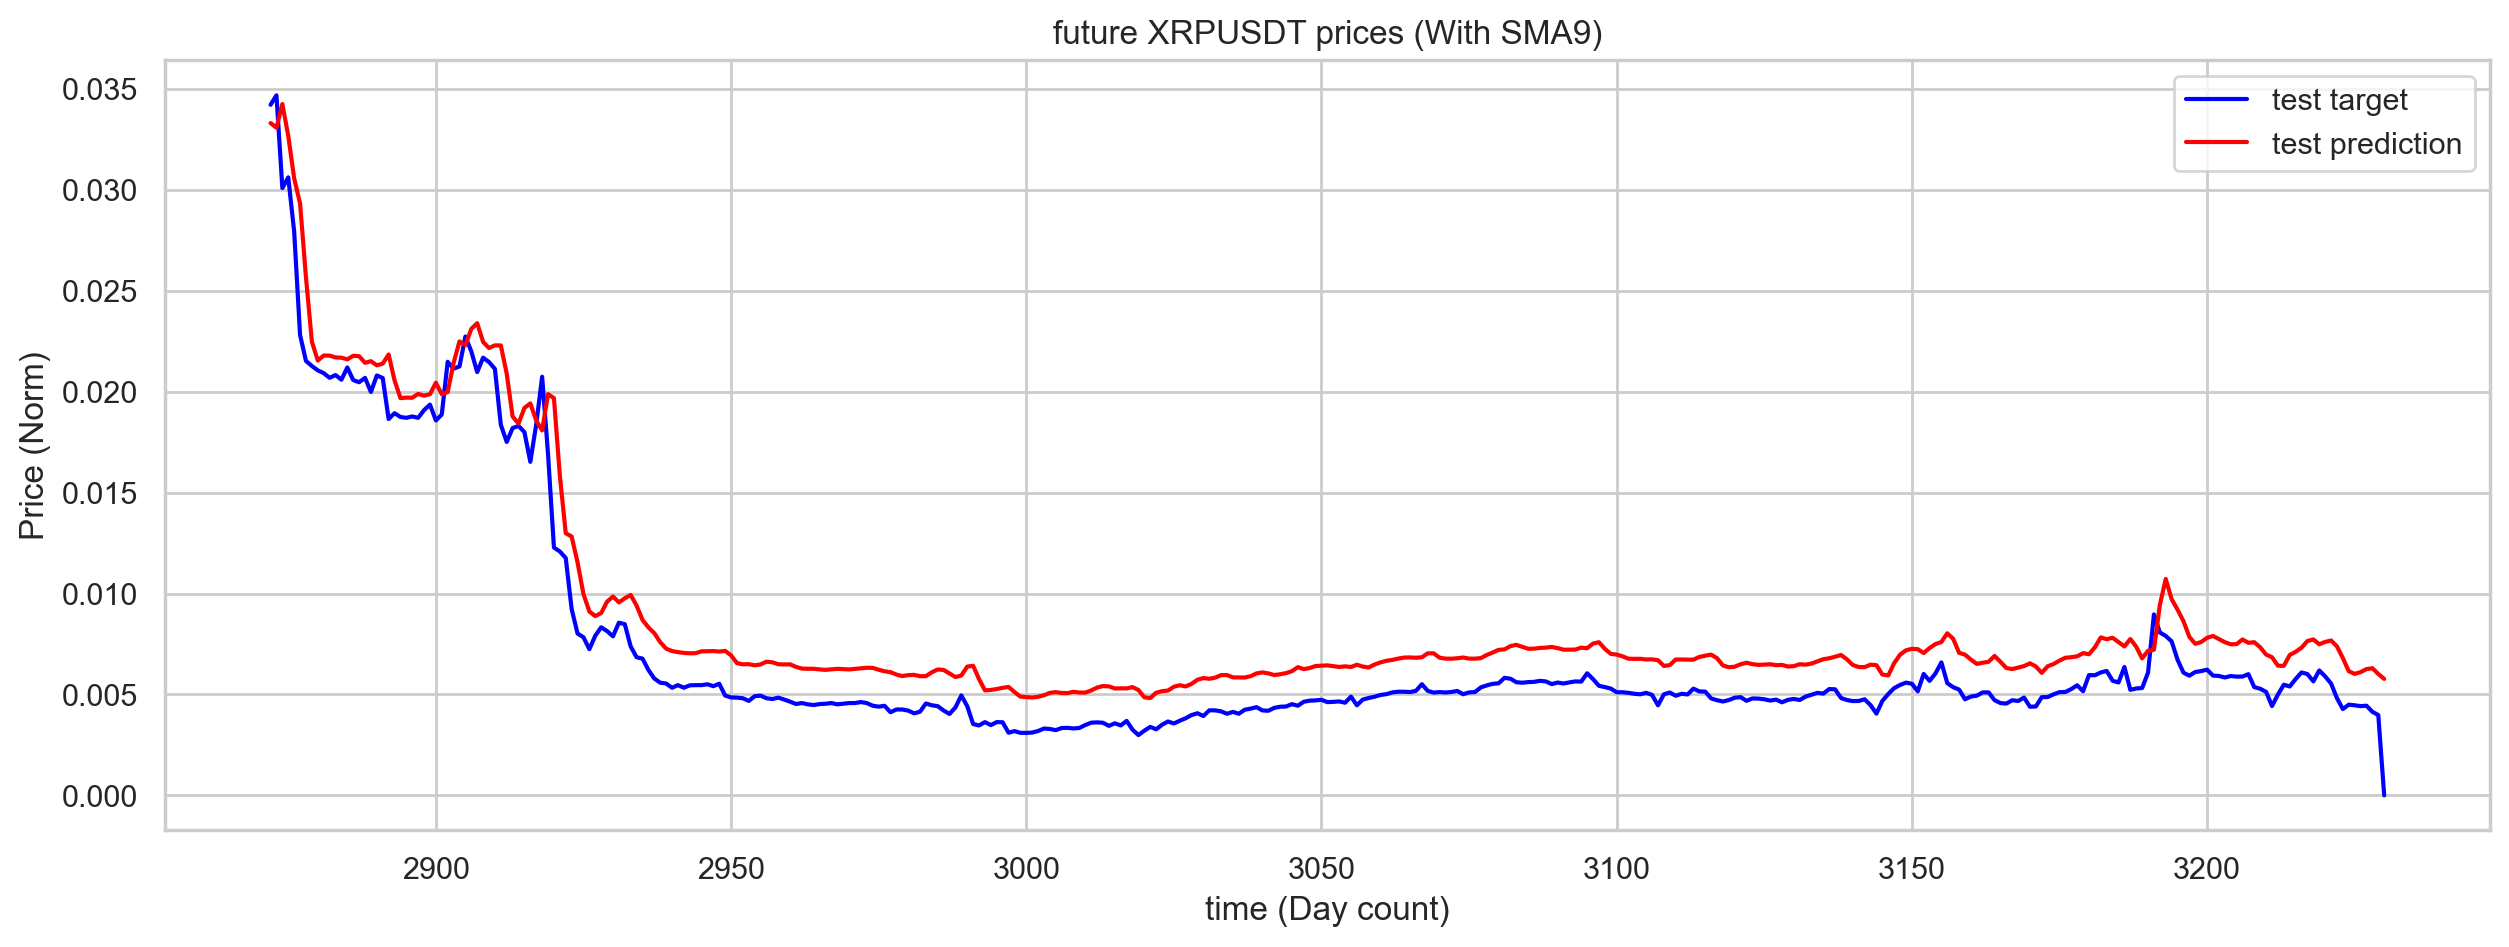

In [165]:
model_9d =torch.load('saved_weights_9d.pt', weights_only=False) 

x_test_9d = torch.tensor(x_test_9d).float()

with torch.no_grad():
    y_test_pred_9d = model_9d(x_test_9d)

y_test_pred_9d = y_test_pred_9d.numpy()[0]

idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0]+y_test_9d.shape[0]),
         y_test_9d[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0]+y_test_pred_9d.shape[0]),
         y_test_pred_9d[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA9)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot()

In [166]:
model_20d = NeuralNetwork(5)

optimizer = optim.Adam(model_20d.parameters())

def train(dataloader):
    epoch_loss = 0
    model_20d.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_20d(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

def evaluate(dataloader):
    epoch_loss = 0
    model_20d.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_20d(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

n_epochs = 150
best_valid_loss_20d = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_20d = train(train_dataloader_20d)
    valid_loss_20d = evaluate(valid_dataloader_20d)
    
    #save the best model
    if valid_loss_20d < best_valid_loss_20d:
        best_valid_loss_20d = valid_loss_20d
        torch.save(model_20d, 'saved_weights_20d.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_20d:.5f} | ' + f'\tVal Loss: {valid_loss_20d:.5f}\n')


	Train Loss: 23.89161 | 	Val Loss: 0.01209

	Train Loss: 6.50490 | 	Val Loss: 0.00437

	Train Loss: 1.09059 | 	Val Loss: 0.00383

	Train Loss: 0.77011 | 	Val Loss: 0.00382

	Train Loss: 0.75159 | 	Val Loss: 0.00403

	Train Loss: 0.92228 | 	Val Loss: 0.00437

	Train Loss: 1.31291 | 	Val Loss: 0.00438

	Train Loss: 1.57723 | 	Val Loss: 0.00346

	Train Loss: 1.23712 | 	Val Loss: 0.00239

	Train Loss: 0.78011 | 	Val Loss: 0.00184

	Train Loss: 0.54585 | 	Val Loss: 0.00158

	Train Loss: 0.45144 | 	Val Loss: 0.00146

	Train Loss: 0.42435 | 	Val Loss: 0.00142

	Train Loss: 0.43371 | 	Val Loss: 0.00143

	Train Loss: 0.46258 | 	Val Loss: 0.00146

	Train Loss: 0.48831 | 	Val Loss: 0.00146

	Train Loss: 0.50419 | 	Val Loss: 0.00145

	Train Loss: 0.47817 | 	Val Loss: 0.00130

	Train Loss: 0.50883 | 	Val Loss: 0.00130

	Train Loss: 0.44835 | 	Val Loss: 0.00120

	Train Loss: 0.41243 | 	Val Loss: 0.00111

	Train Loss: 0.37883 | 	Val Loss: 0.00103

	Train Loss: 0.34810 | 	Val Loss: 0.00099

	Train Los

[]

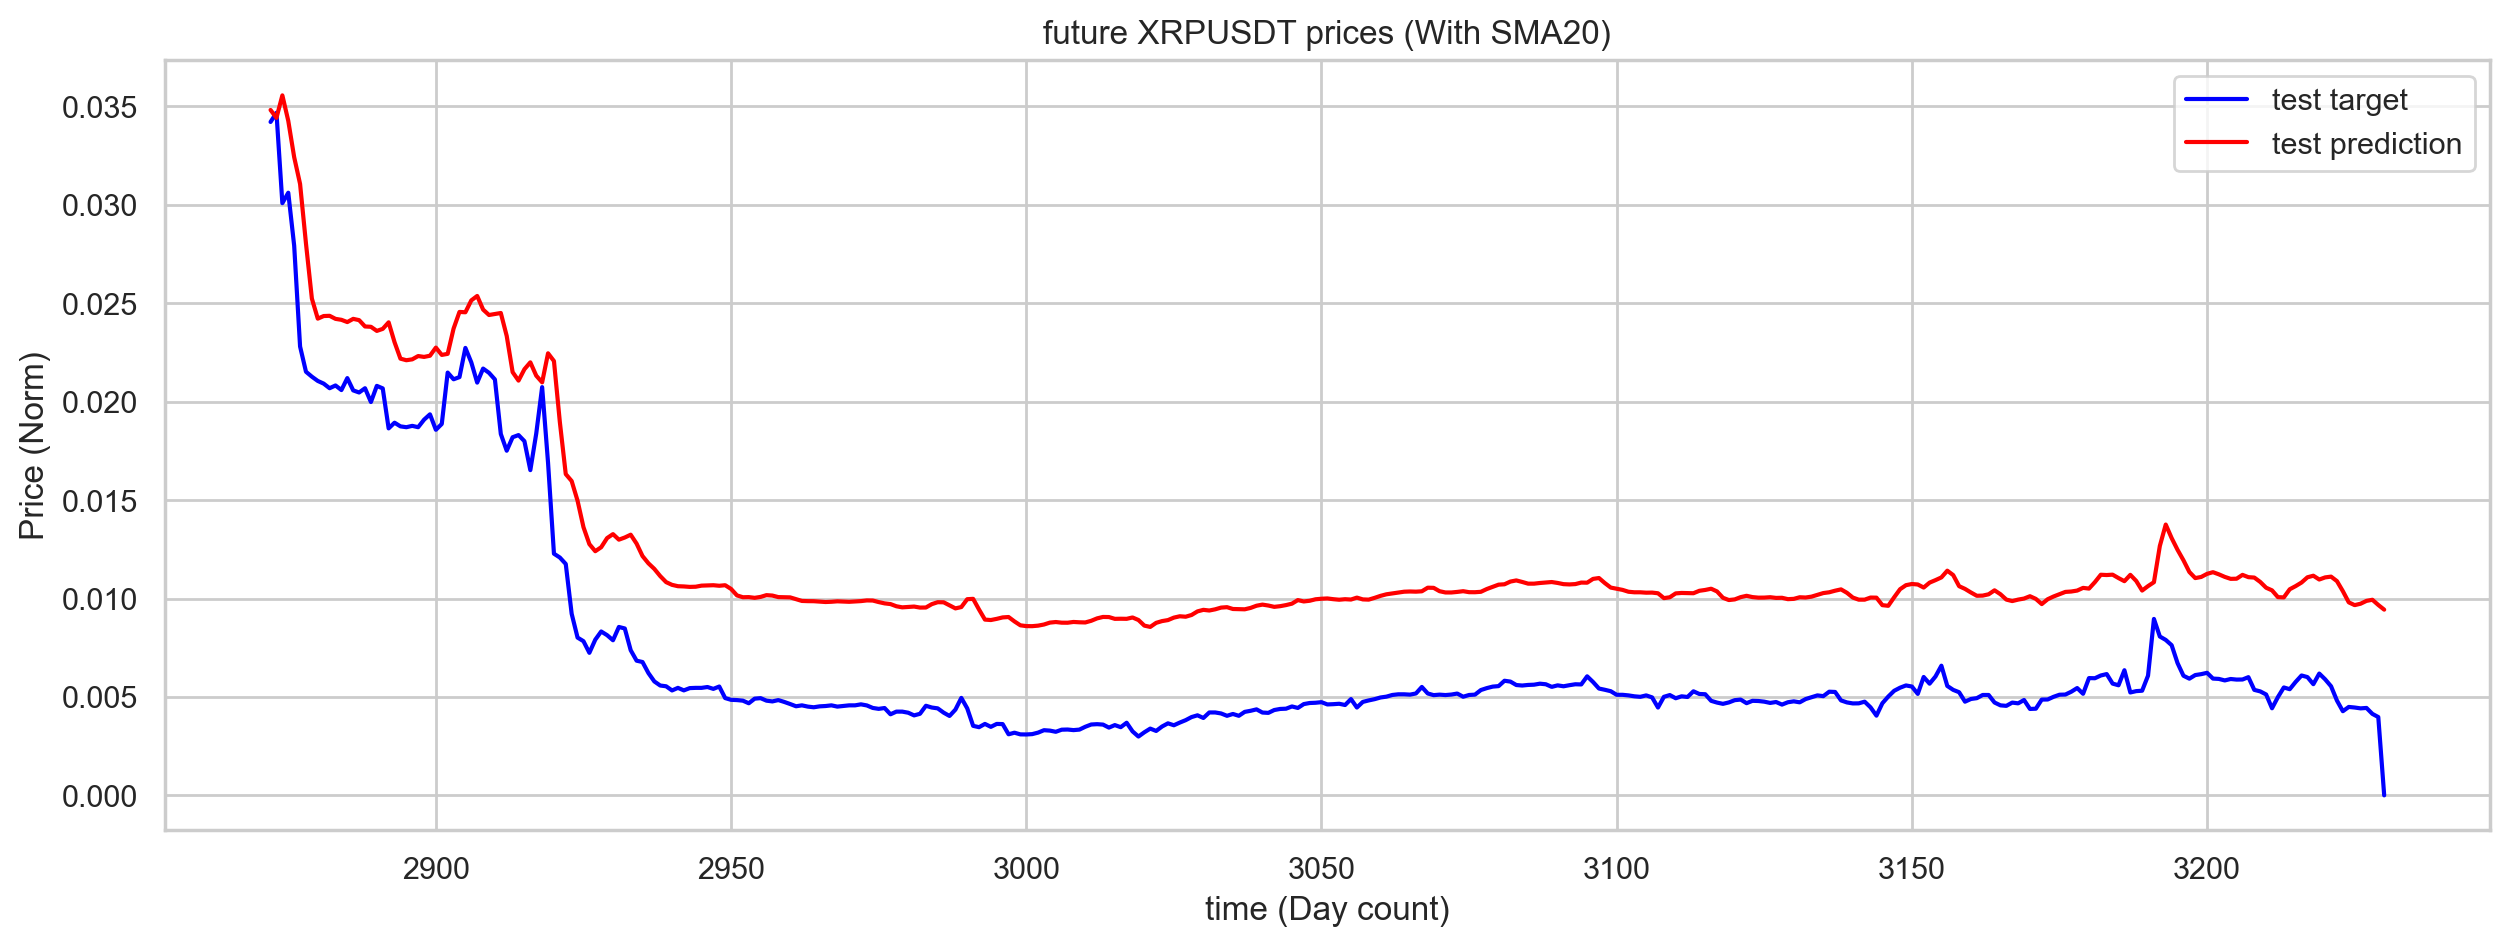

In [167]:
model_20d =torch.load('saved_weights_20d.pt', weights_only=False) 

x_test_20d = torch.tensor(x_test_20d).float()

with torch.no_grad():
    y_test_pred_20d = model_20d(x_test_20d)

y_test_pred_20d = y_test_pred_20d.numpy()[0]

idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_20d.shape[0], y_train_20d.shape[0]+y_test_20d.shape[0]),
         y_test_20d[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_20d.shape[0], y_train_20d.shape[0]+y_test_pred_20d.shape[0]),
         y_test_pred_20d[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA20)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot()



In [168]:
model_all = NeuralNetwork(7)

optimizer = optim.Adam(model_all.parameters())

def train(dataloader):
    epoch_loss = 0
    model_all.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model_all(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

def evaluate(dataloader):
    epoch_loss = 0
    model_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x,y= batch
            pred = model_all(x)
            loss = mse(pred[0],y)              
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

n_epochs = 150
best_valid_loss_all = float('inf')

for epoch in range(1, n_epochs + 1):

    train_loss_all = train(train_dataloader_all)
    valid_loss_all = evaluate(valid_dataloader_all)
    
    #save the best model
    if valid_loss_all < best_valid_loss_all:
        best_valid_loss_all = valid_loss_all
        torch.save(model_all, 'saved_weights_all.pt')

    # print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss_all:.5f} | ' + f'\tVal Loss: {valid_loss_all:.5f}\n')

	Train Loss: 20.54263 | 	Val Loss: 0.00937

	Train Loss: 3.90520 | 	Val Loss: 0.00421

	Train Loss: 1.37119 | 	Val Loss: 0.00347

	Train Loss: 0.78189 | 	Val Loss: 0.00303

	Train Loss: 0.61379 | 	Val Loss: 0.00287

	Train Loss: 0.60080 | 	Val Loss: 0.00292

	Train Loss: 0.71372 | 	Val Loss: 0.00306

	Train Loss: 0.92082 | 	Val Loss: 0.00301

	Train Loss: 1.04272 | 	Val Loss: 0.00252

	Train Loss: 0.89717 | 	Val Loss: 0.00193

	Train Loss: 0.65059 | 	Val Loss: 0.00152

	Train Loss: 0.48377 | 	Val Loss: 0.00130

	Train Loss: 0.40042 | 	Val Loss: 0.00119

	Train Loss: 0.36633 | 	Val Loss: 0.00114

	Train Loss: 0.36099 | 	Val Loss: 0.00113

	Train Loss: 0.37323 | 	Val Loss: 0.00115

	Train Loss: 0.39449 | 	Val Loss: 0.00118

	Train Loss: 0.41536 | 	Val Loss: 0.00119

	Train Loss: 0.42627 | 	Val Loss: 0.00118

	Train Loss: 0.42144 | 	Val Loss: 0.00114

	Train Loss: 0.40196 | 	Val Loss: 0.00107

	Train Loss: 0.37407 | 	Val Loss: 0.00100

	Train Loss: 0.34473 | 	Val Loss: 0.00094

	Train Los

[]

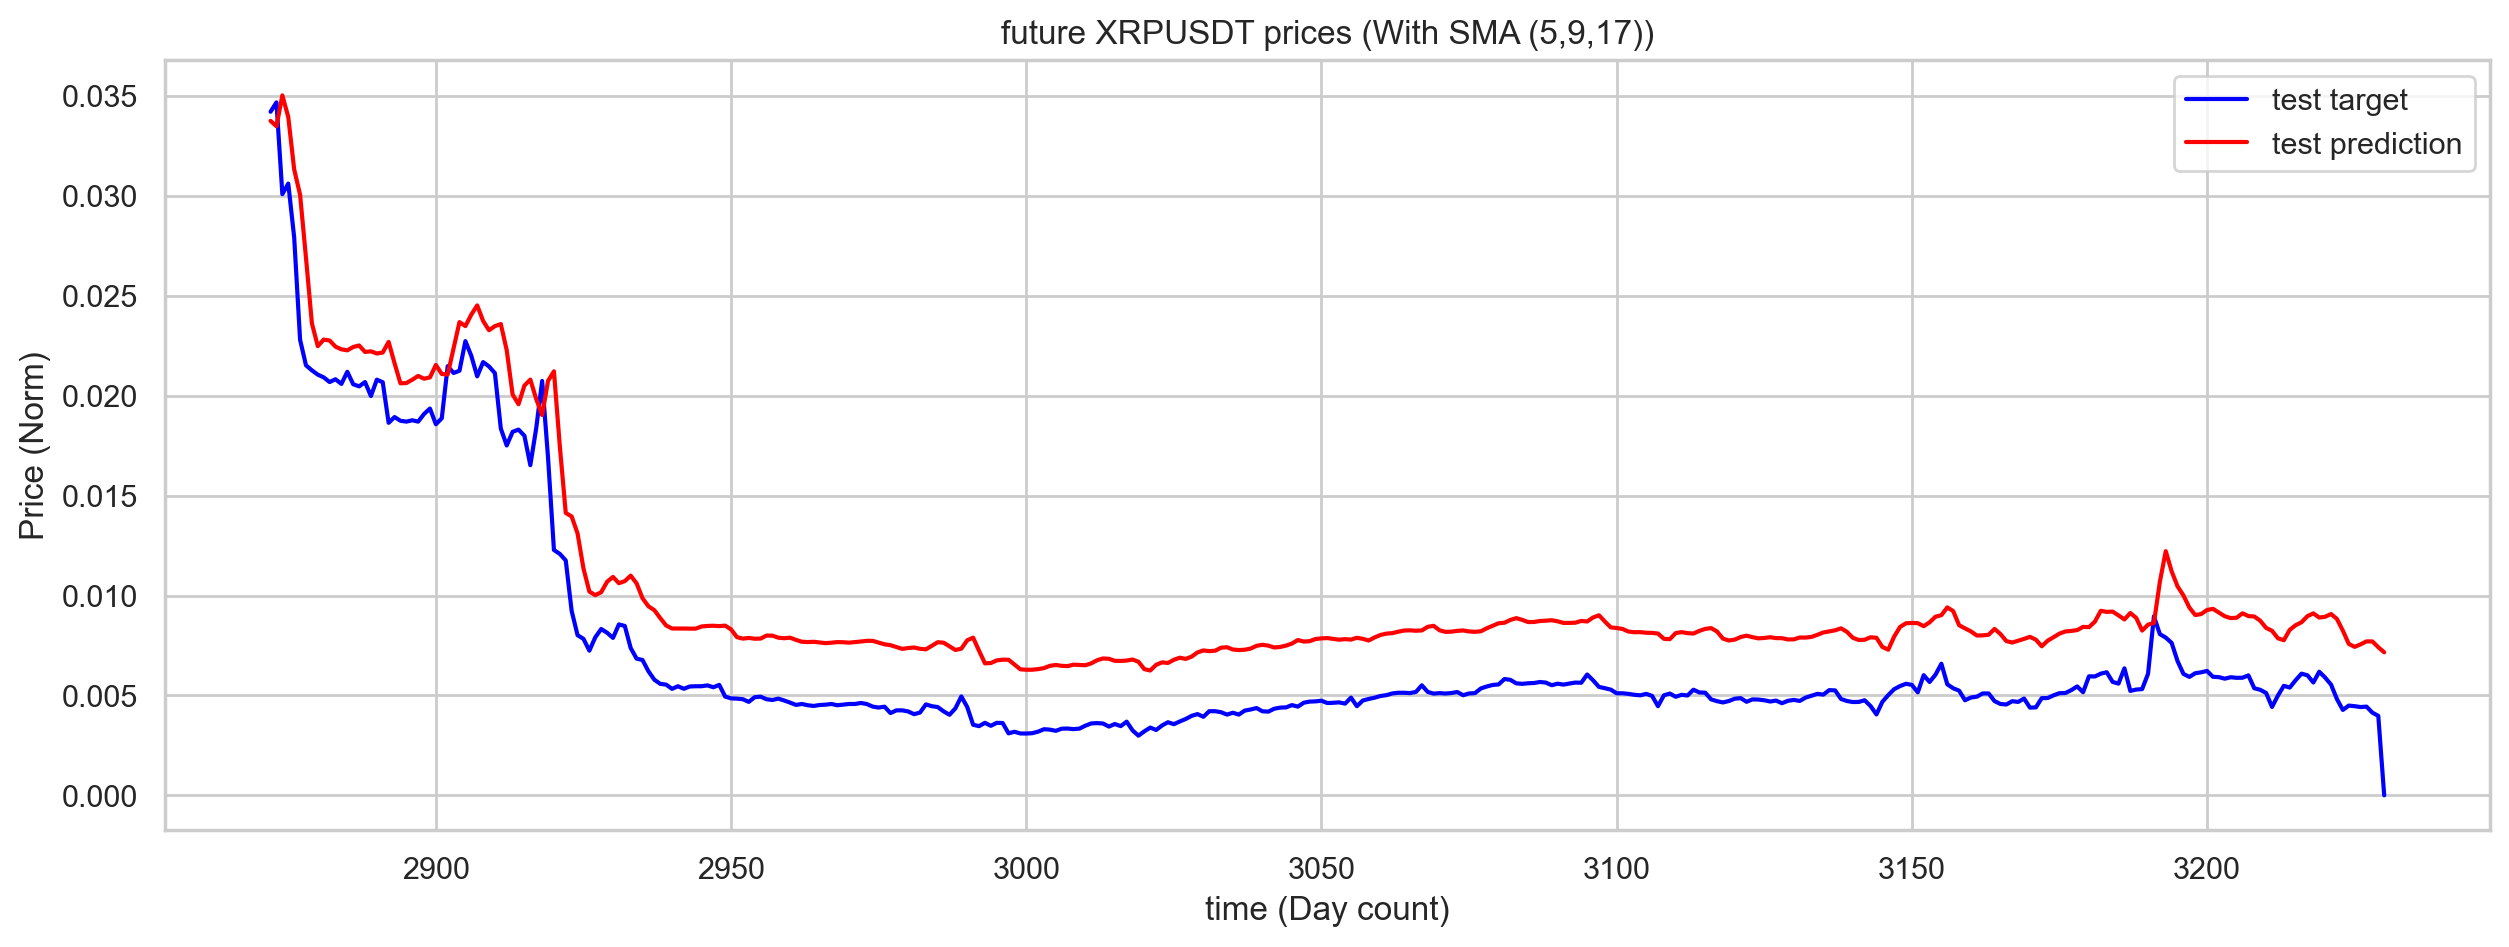

In [170]:
model_all =torch.load('saved_weights_all.pt', weights_only=False)

x_test_all = torch.tensor(x_test_all).float()

with torch.no_grad():
    y_test_pred_all = model_all(x_test_all)

y_test_pred_all = y_test_pred_all.numpy()[0]

idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0]+y_test_all.shape[0]),
         y_test_all[:,idx], color='blue', label='test target')

plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0]+y_test_pred_all.shape[0]),
         y_test_pred_all[:,idx], color='red', label='test prediction')

plt.title('future XRPUSDT prices (With SMA (5,9,17))')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot()

[]

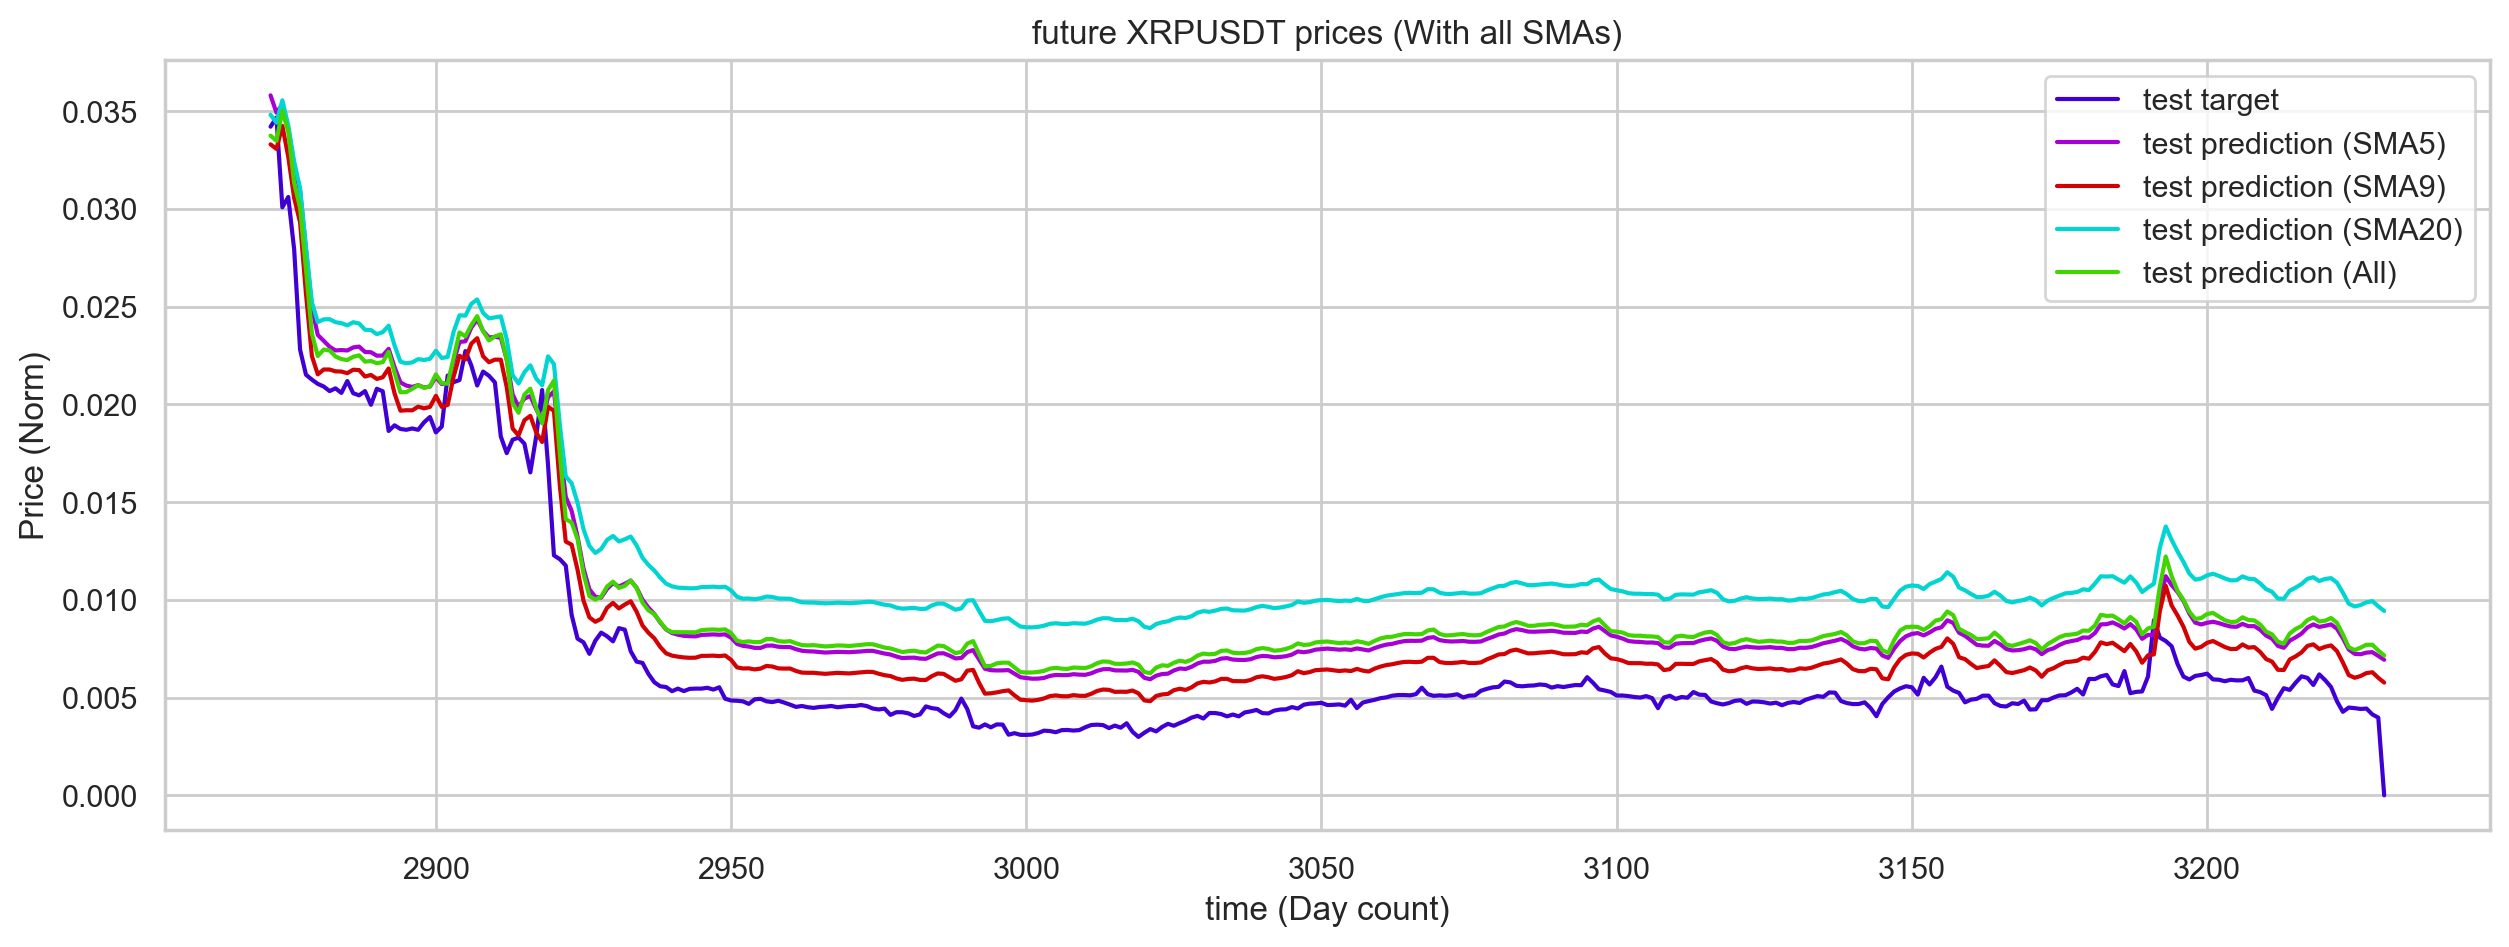

In [171]:
idx=0
plt.figure(figsize=(15,5), dpi=200)
plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_5d.shape[0]),
         y_test_5d[:,idx], color='#4000D5', label='test target')

plt.plot(np.arange(y_train_5d.shape[0], y_train_5d.shape[0]+y_test_pred_5d.shape[0]),
         y_test_pred_5d[:,idx], color='#A700D5', label='test prediction (SMA5)')

plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0]+y_test_pred_9d.shape[0]),
         y_test_pred_9d[:,idx], color='#D20103', label='test prediction (SMA9)')

plt.plot(np.arange(y_train_20d.shape[0], y_train_20d.shape[0]+y_test_pred_20d.shape[0]),
         y_test_pred_20d[:,idx], color='#00D5D2', label='test prediction (SMA20)')

plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0]+y_test_pred_all.shape[0]),
         y_test_pred_all[:,idx], color='#40D500', label='test prediction (All)')



plt.title('future XRPUSDT prices (With all SMAs)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot()

In [ ]:
sma_window = 14


In [192]:
for sma_window in range(5,15):    
    df[f"{sma_window}d_sma"] = df["Close"].rolling(sma_window).mean()
    df[f"{sma_window}d_sma"] = df[f"{sma_window}d_sma"].fillna(df['Close'])
    _d = df[['Open','High','Low','Days', f'{sma_window}d_sma','Volume','Close']].copy(deep=True)

    scaler = MinMaxScaler(feature_range=(0,2)).fit(_d.Low.values.reshape(-1,1))

    _d['Open'] = scaler.transform(_d.Open.values.reshape(-1,1))
    _d['High'] = scaler.transform(_d.High.values.reshape(-1,1))
    _d['Low'] = scaler.transform(_d.Low.values.reshape(-1,1))
    _d['Close'] = scaler.transform(_d.Close.values.reshape(-1,1))
    _d['Volume'] = scaler.transform(_d.Volume.values.reshape(-1,1))
    _d['Days'] = scaler.transform(_d.Days.values.reshape(-1,1))
    _d[f'{sma_window}d_sma'] = scaler.transform(_d[f'{sma_window}d_sma'].values.reshape(-1,1))

    data_nd = _d[['Open','High','Low', f'{sma_window}d_sma','Close']].values

    sequences_nd=[]
    for index in range(len(data_nd) - seq_len + 1):
        sequences_nd.append(data_nd[index: index + seq_len])
    sequences_nd = np.array(sequences_nd)
    print(sequences_nd.shape)

    valid_set_size_nd = int(np.round(valid_set_size_percentage/100*sequences_nd.shape[0]))
    test_set_size_nd  = int(np.round(test_set_size_percentage/100*sequences_nd.shape[0]))
    train_set_size_nd = sequences_nd.shape[0] - (valid_set_size_nd + test_set_size_nd)

    x_train_nd = sequences_nd[:train_set_size_nd,:-1,:]
    y_train_nd = sequences_nd[:train_set_size_nd,-1,:]

    x_valid_nd = sequences_nd[train_set_size_nd:train_set_size_nd+valid_set_size_nd,:-1,:]
    y_valid_nd = sequences_nd[train_set_size_nd:train_set_size_nd+valid_set_size_nd,-1,:]

    x_test_nd = sequences_nd[train_set_size_nd+valid_set_size_nd:,:-1,:]
    y_test_nd = sequences_nd[train_set_size_nd+valid_set_size_nd:,-1,:]

    x_train_nd = torch.tensor(x_train_nd).float()
    y_train_nd = torch.tensor(y_train_nd).float()

    x_valid_nd = torch.tensor(x_valid_nd).float()
    y_valid_nd = torch.tensor(y_valid_nd).float()

    train_dataset_nd = TensorDataset(x_train_nd,y_train_nd)
    train_dataloader_nd = DataLoader(train_dataset_nd, batch_size=32, shuffle=False)

    valid_dataset_nd = TensorDataset(x_valid_nd,y_valid_nd)
    valid_dataloader_nd = DataLoader(valid_dataset_nd, batch_size=32, shuffle=False)

    model_nd = NeuralNetwork(5)

    optimizer = optim.Adam(model_nd.parameters())

    def train(dataloader):
        epoch_loss = 0
        model_nd.train()

        for batch in dataloader:
            optimizer.zero_grad()          
            x,y= batch
            pred = model_nd(x)
            loss = mse(pred[0],y)        
            loss.backward()               
            optimizer.step()      
            epoch_loss += loss.item()  
            
        return epoch_loss

    def evaluate(dataloader):
        epoch_loss = 0
        model_nd.eval()

        with torch.no_grad():
            for batch in dataloader:   
                x,y= batch
                pred = model_nd(x)
                loss = mse(pred[0],y)              
                epoch_loss += loss.item()  
            
        return epoch_loss / len(dataloader)

    n_epochs = 150
    best_valid_loss_nd = float('inf')

    for epoch in range(1, n_epochs + 1):

        train_loss_nd = train(train_dataloader_nd)
        valid_loss_nd = evaluate(valid_dataloader_nd)

        #save the best model
        if valid_loss_nd < best_valid_loss_nd:
            best_valid_loss_nd = valid_loss_nd
            torch.save(model_nd, 'saved_weights_nd.pt')

        # print("Epoch ",epoch+1)
        print(f'\tTrain Loss: {train_loss_nd:.5f} | ' + f'\tVal Loss: {valid_loss_nd:.5f}\n')

    model_nd =torch.load('saved_weights_nd.pt', weights_only=False)

    x_test_nd = torch.tensor(x_test_nd).float()

    with torch.no_grad():
        y_test_pred_nd = model_nd(x_test_nd)

    y_test_pred_nd = y_test_pred_nd.numpy()[0]

    # idx=0
    # plt.figure(figsize=(15,5), dpi=200)
    # plt.plot(np.arange(y_train_nd.shape[0], y_train_nd.shape[0]+y_test_nd.shape[0]),
    # y_test_nd[:,idx], color='blue', label='test target')

    # plt.plot(np.arange(y_train_nd.shape[0], y_train_nd.shape[0]+y_test_pred_nd.shape[0]),
    # y_test_pred_nd[:,idx], color='red', label='test prediction')

    # plt.title('future XRPUSDT prices (With SMAn)')
    # plt.xlabel('time (Day count)')
    # plt.ylabel('Price (Norm)')
    # plt.legend(loc='best')
    # plt.plot()


    ress[sma_window] = y_test_pred_nd[:,0]

(3590, 11, 5)
	Train Loss: 23.14995 | 	Val Loss: 0.00941

	Train Loss: 7.04837 | 	Val Loss: 0.00359

	Train Loss: 0.87097 | 	Val Loss: 0.00332

	Train Loss: 0.51189 | 	Val Loss: 0.00278

	Train Loss: 0.37460 | 	Val Loss: 0.00250

	Train Loss: 0.32664 | 	Val Loss: 0.00246

	Train Loss: 0.35145 | 	Val Loss: 0.00269

	Train Loss: 0.57772 | 	Val Loss: 0.00355

	Train Loss: 1.38166 | 	Val Loss: 0.00433

	Train Loss: 2.40240 | 	Val Loss: 0.00262

	Train Loss: 1.37390 | 	Val Loss: 0.00155

	Train Loss: 0.54003 | 	Val Loss: 0.00108

	Train Loss: 0.30613 | 	Val Loss: 0.00090

	Train Loss: 0.24029 | 	Val Loss: 0.00082

	Train Loss: 0.22482 | 	Val Loss: 0.00079

	Train Loss: 0.23560 | 	Val Loss: 0.00081

	Train Loss: 0.26905 | 	Val Loss: 0.00087

	Train Loss: 0.32392 | 	Val Loss: 0.00097

	Train Loss: 0.39052 | 	Val Loss: 0.00105

	Train Loss: 0.44510 | 	Val Loss: 0.00108

	Train Loss: 0.46122 | 	Val Loss: 0.00104

	Train Loss: 0.43482 | 	Val Loss: 0.00097

	Train Loss: 0.38717 | 	Val Loss: 0.000

[]

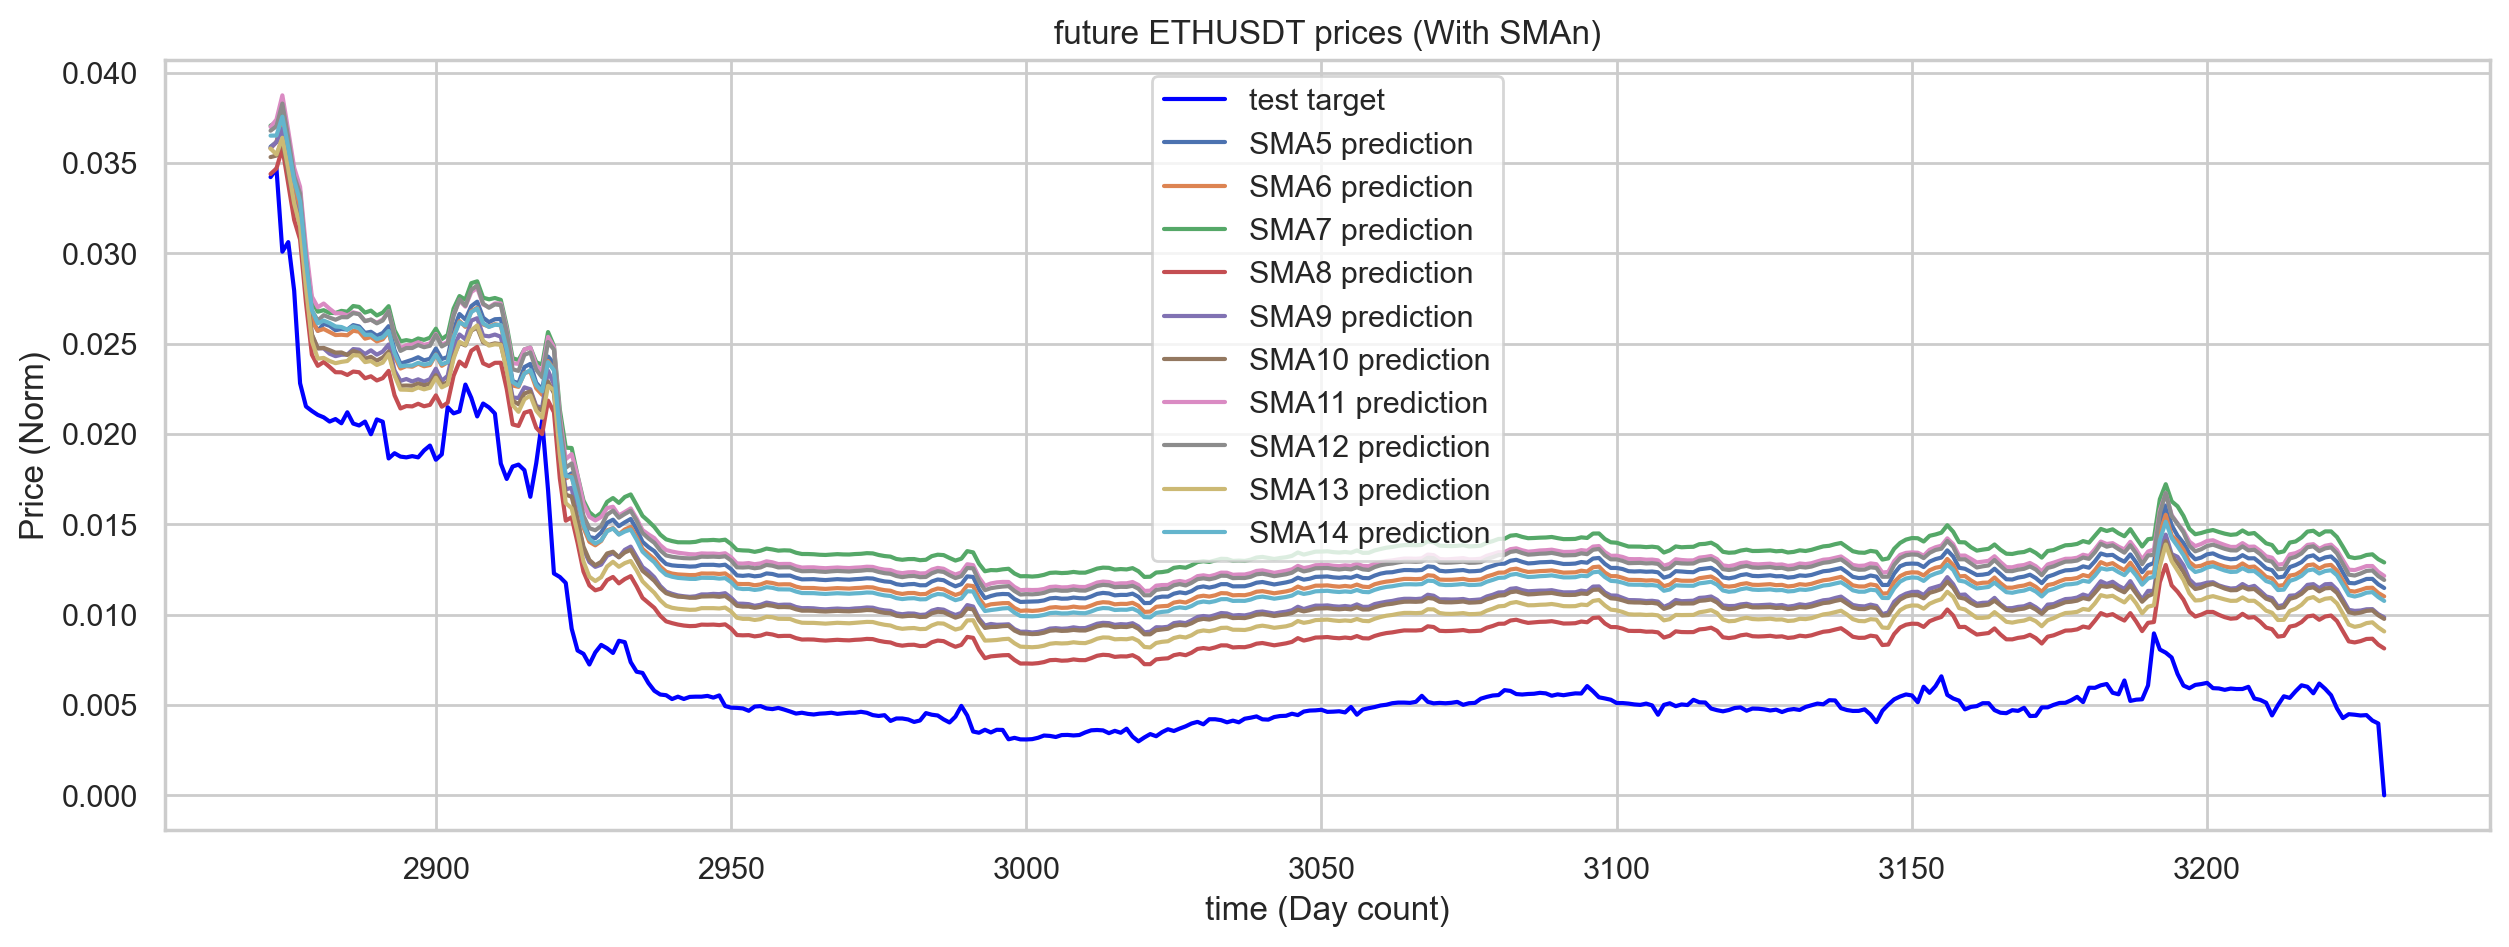

In [194]:
idx = 0
plt.figure(figsize=(15,5), dpi=200)

plt.plot(
    np.arange(y_train_nd.shape[0], y_train_nd.shape[0] + y_test_nd.shape[0]),
    y_test_nd[:, idx],
    color='blue',
    label='test target'
)

for sma_window in ress.keys():
    plt.plot(
        np.arange(y_train_nd.shape[0], y_train_nd.shape[0] + ress[sma_window].shape[0]),
        ress[sma_window],
        label=f'SMA{sma_window} prediction'
    )

plt.title('future ETHUSDT prices (With SMAn)')
plt.xlabel('time (Day count)')
plt.ylabel('Price (Norm)')
plt.legend(loc='best')
plt.plot()
